In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 159.83865423120542
Iteration 2, RMSE: 282.66135914691387
Iteration 3, RMSE: 215.88721011165362
Iteration 4, RMSE: 238.86799721340364
Iteration 5, RMSE: 395.3929151304567
Iteration 6, RMSE: 191.20289111665565
Iteration 7, RMSE: 189.14170878701273
Iteration 8, RMSE: 219.75114474589577
Iteration 9, RMSE: 156.4705726724133
Iteration 10, RMSE: 160.14839302615383
Iteration 11, RMSE: 215.42805610536348
Iteration 12, RMSE: 170.14112829042466
Iteration 13, RMSE: 261.8064408700735
Iteration 14, RMSE: 271.735631883944
Iteration 15, RMSE: 143.3585425505992
Iteration 16, RMSE: 158.03389033782736
Iteration 17, RMSE: 192.93810265164936
Iteration 18, RMSE: 145.56309665747452
Iteration 19, RMSE: 151.27706135701695
Iteration 20, RMSE: 152.36887924214608
Iteration 21, RMSE: 151.5991860854948
Iteration 22, RMSE: 175.4775877684986
Iteration 23, RMSE: 198.54994454026476
Iteration 24, RMSE: 140.96027463773208
Iteration 25, RMSE: 190.60719403856706
Iteration 26, RMSE: 191.50565795096693
Ite

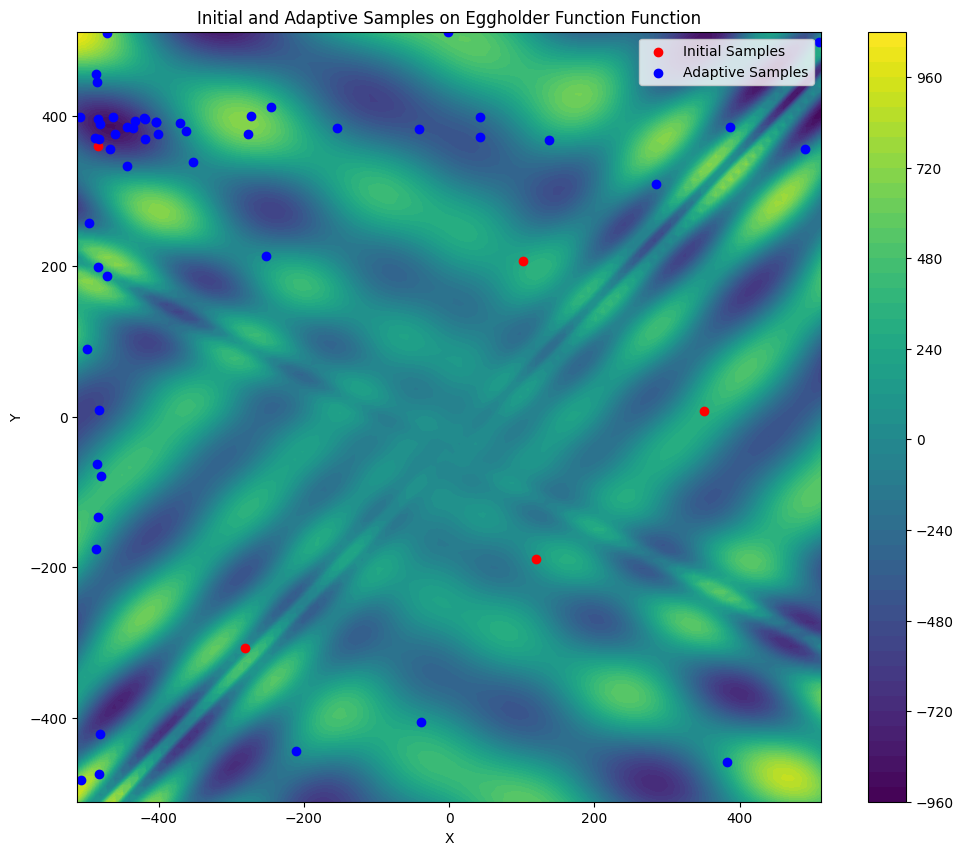

             X           Y
0   120.079242 -188.717240
1  -482.869107  359.794664
2   350.683231    8.247993
3  -280.825189 -307.769570
4   101.556742  206.803388
5   509.009740  497.738778
6    -1.366079  511.551732
7  -470.734924  510.497101
8  -481.471237    9.432405
9  -506.912169 -482.921044
10 -486.270576 -176.119130
11 -252.694897  213.224096
12 -470.234941  187.147765
13 -244.867499  412.175674
14 -495.936444  257.866558
15 -478.701012  -78.812505
16 -486.635695  456.227153
17 -481.968016 -475.679616
18 -480.102114 -421.509089
19  382.259942 -458.726891
20 -499.055154   90.621270
21 -483.346901  395.890707
22  -38.309968 -406.538860
23 -482.072196  368.824135
24 -352.215604  338.188036
25  284.543341  309.360857
26  -41.278571  383.292246
27 -484.747811  -62.291869
28 -484.763649  444.815150
29 -483.253653 -133.789550
30 -370.905396  390.626002
31 -483.690857  198.789669
32 -462.739388  398.485303
33 -210.743057 -444.767145
34 -459.455509  376.412241
35 -273.075963  399.360719
3

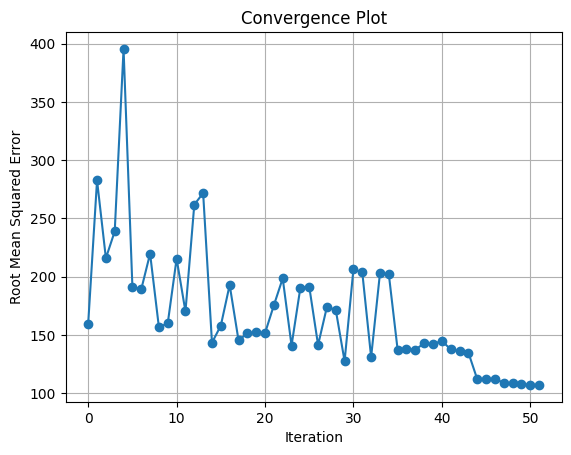

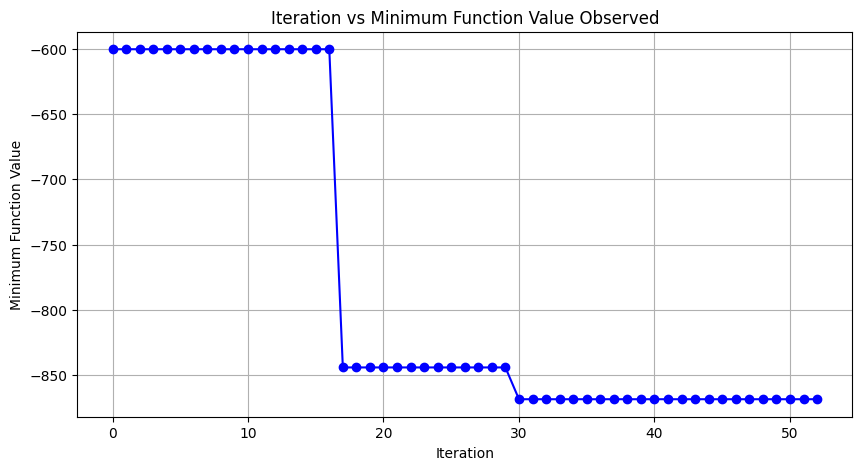

Best observed function value after active learning: -868.6529452715515


In [3]:
range_param = ex_func.function_ranges["Eggholder"]
function_param = ex_func.eggholder

# Generate a mesh for the background function
input, output = samplers.Sampler.generate_mesh(range_param, num_points=100, function= function_param)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(function_param)
initial_points = sampler.sample(num_samples=5, ranges = range_param)
initial_values = np.array([function_param(i) for i in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_visuals(input, output, "Eggholder Function")
sampling_vis.plot_results()

Working on function: Ackley
Iteration 1, RMSE: 1.638424670993597
Iteration 2, RMSE: 1.7527248525927306
Iteration 3, RMSE: 0.9254788376081168
Iteration 4, RMSE: 1.180572302388538
Iteration 5, RMSE: 1.1760910386155747
Convergence reached at iteration 5.


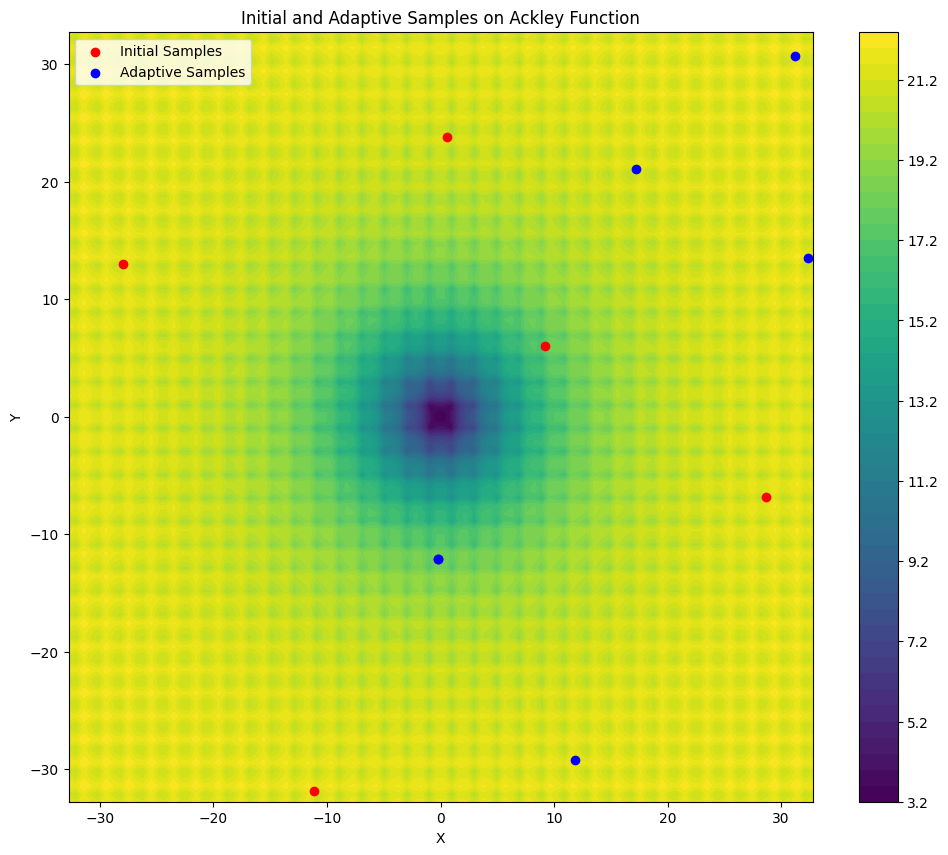

            X          Y
0  -27.931278  13.031017
1    9.189736   5.980852
2   28.683209  -6.852900
3  -11.122881 -31.818312
4    0.570171  23.828691
5   31.258815  30.691837
6   17.205796  21.124444
7   32.411777  13.550775
8   11.810623 -29.258579
9   -0.252892 -12.084431
10  -0.252892 -12.084431


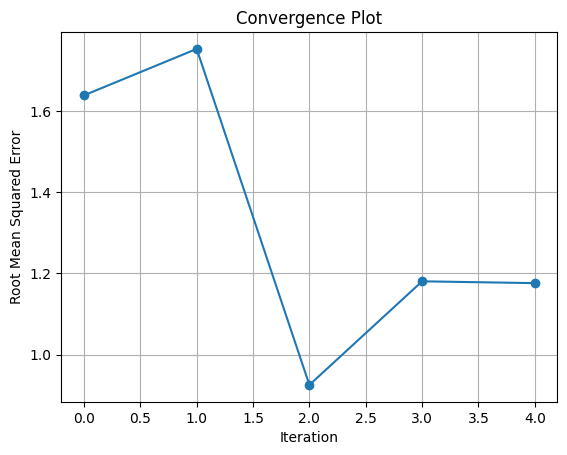

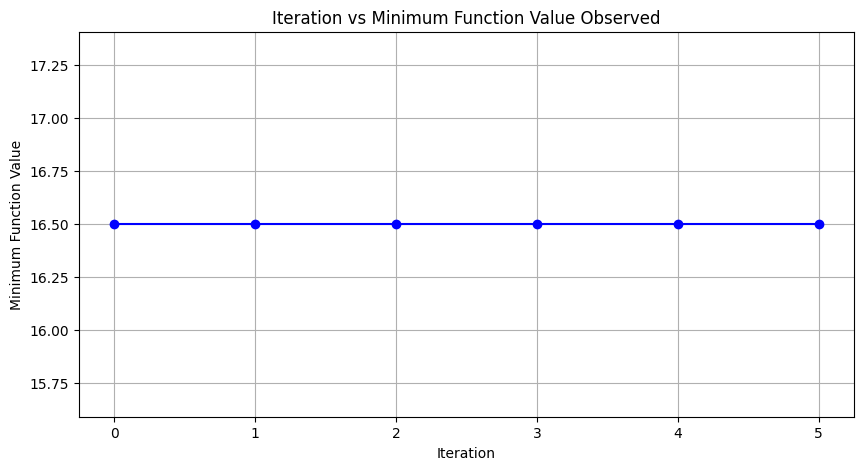

Best observed function value after active learning: 16.499689928575712
Actual global min value is: 0
******
******
******
******
Working on function: Bukin
Iteration 1, RMSE: 33.827311263097116
Iteration 2, RMSE: 37.90336385369097
Iteration 3, RMSE: 14.63116867290512
Iteration 4, RMSE: 22.352695128279038
Iteration 5, RMSE: 21.62689799894812
Iteration 6, RMSE: 11.874521975403697
Iteration 7, RMSE: 11.402575935208194
Iteration 8, RMSE: 15.046990515796313
Iteration 9, RMSE: 13.92248592848138
Iteration 10, RMSE: 16.148401014362488
Iteration 11, RMSE: 15.991717936567422
Iteration 12, RMSE: 10.443061683150553
Iteration 13, RMSE: 11.693855407933702
Iteration 14, RMSE: 12.849958499337376
Iteration 15, RMSE: 10.49411892149693
Iteration 16, RMSE: 14.33754302249397
Iteration 17, RMSE: 15.26156837997134
Iteration 18, RMSE: 9.92130225663467
Iteration 19, RMSE: 10.47964511325043
Iteration 20, RMSE: 11.138519829484231
Iteration 21, RMSE: 9.12727035809691
Iteration 22, RMSE: 12.472115710388737
Iterati

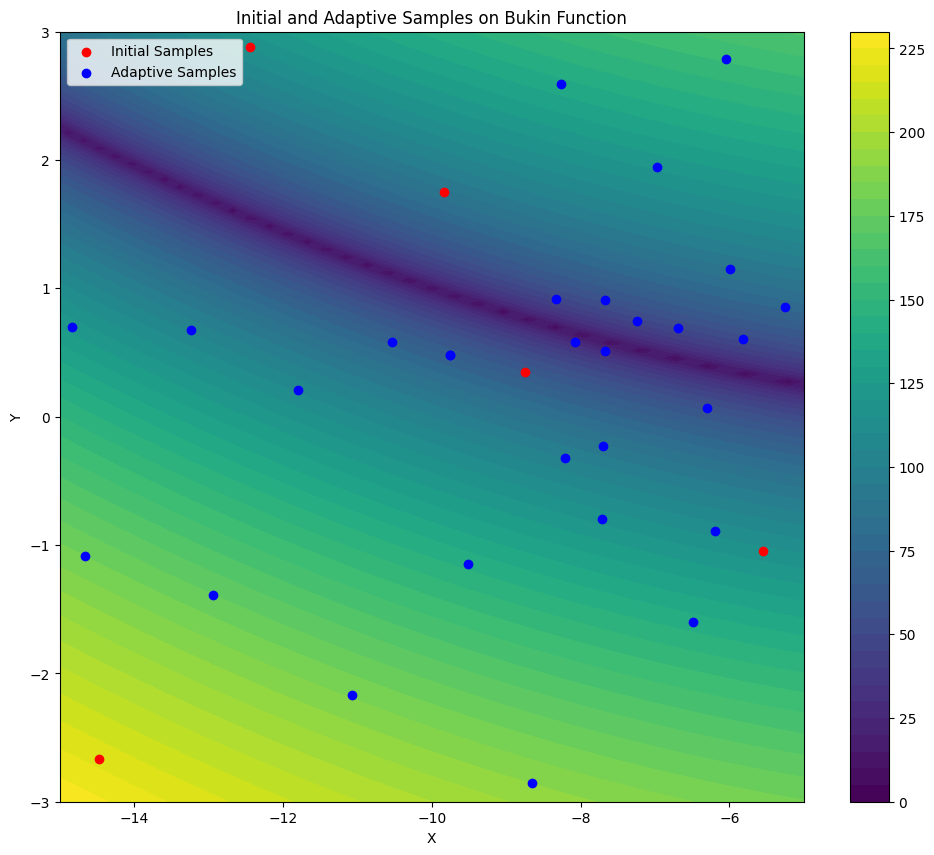

            X         Y
0  -12.445673  2.879764
1   -8.749627  0.346142
2   -9.834474  1.748160
3  -14.476782 -2.665478
4   -5.542389 -1.047322
5   -8.650671 -2.850911
6  -11.071370 -2.169418
7  -14.833222  0.701135
8   -6.044412  2.783925
9   -7.706374 -0.796234
10  -9.512806 -1.145064
11 -11.800272  0.204912
12  -8.264770  2.596303
13  -6.691773  0.692845
14  -5.821865  0.603123
15 -13.237746  0.677861
16  -5.995759  1.147799
17  -6.495462 -1.597613
18  -6.298942  0.070951
19 -10.533147  0.578469
20  -7.669897  0.512267
21 -12.936163 -1.387609
22  -6.979095  1.945972
23  -7.703652 -0.225613
24  -8.206315 -0.323890
25  -7.237175  0.748099
26 -14.666018 -1.086116
27  -6.190244 -0.891509
28  -7.668127  0.908896
29  -8.330964  0.913517
30  -5.254682  0.857225
31  -8.075031  0.583434
32  -9.759661  0.479821
33  -9.759661  0.479821


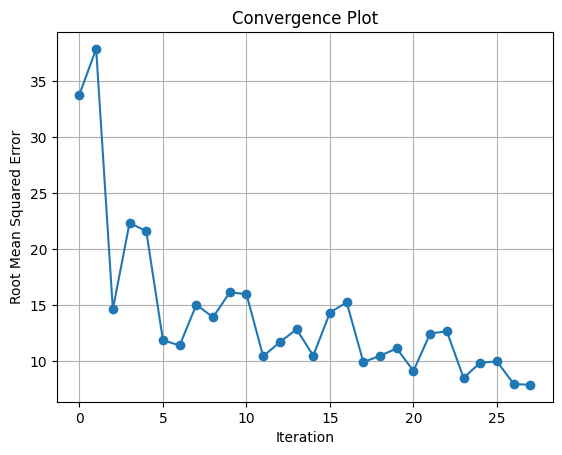

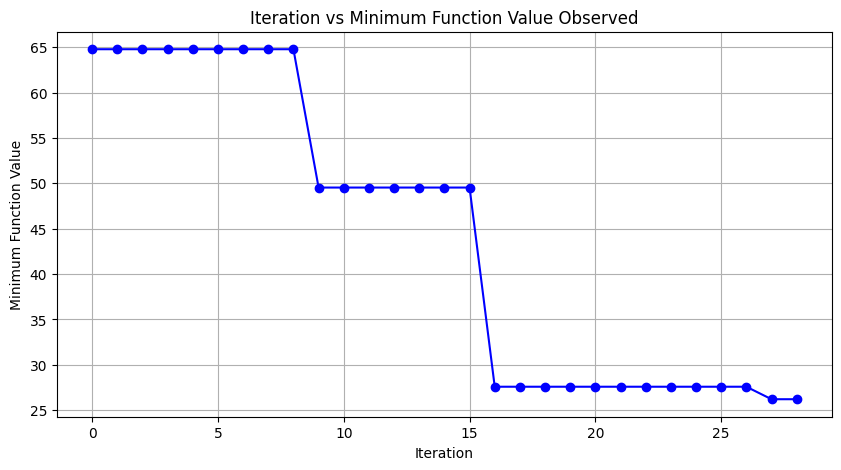

Best observed function value after active learning: 26.216096276958087
Actual global min value is: 0
******
******
******
******
Working on function: Cross in Tray
Iteration 1, RMSE: 0.16537332261724544
Iteration 2, RMSE: 0.16824783463738854
Convergence reached at iteration 2.


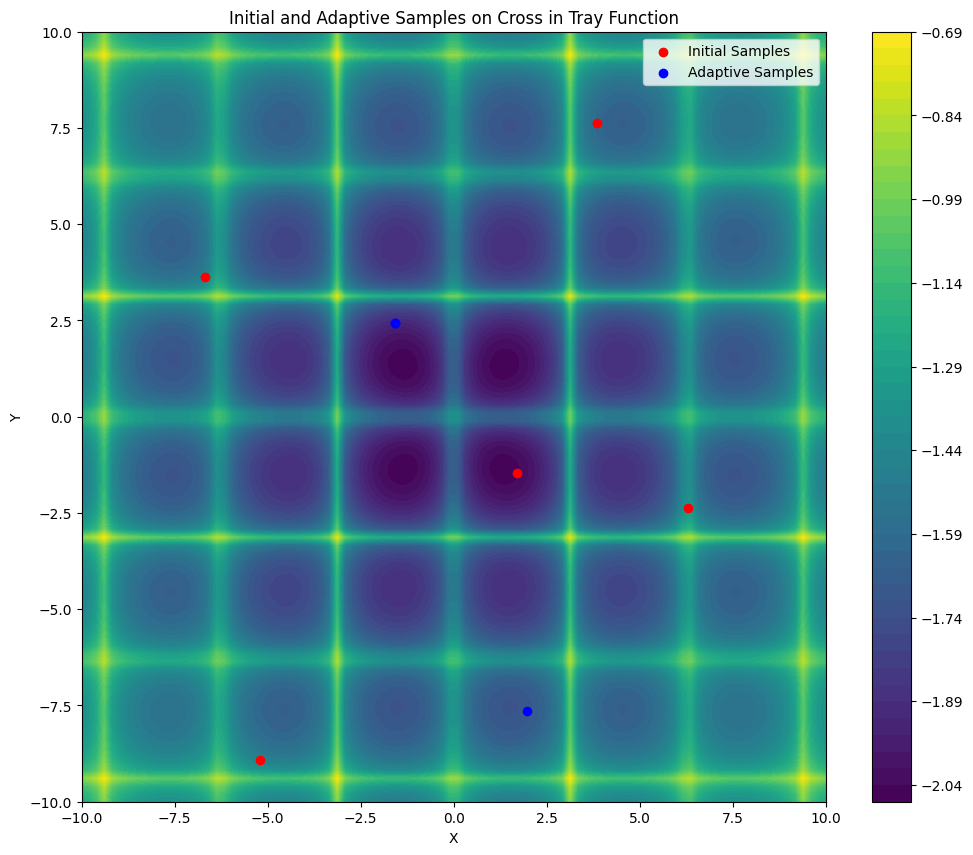

          X         Y
0 -5.211354 -8.906854
1  1.703117 -1.459886
2 -6.697411  3.634323
3  3.866622  7.639536
4  6.296845 -2.381738
5  1.982669 -7.656141
6 -1.587546  2.437774
7 -1.587546  2.437774


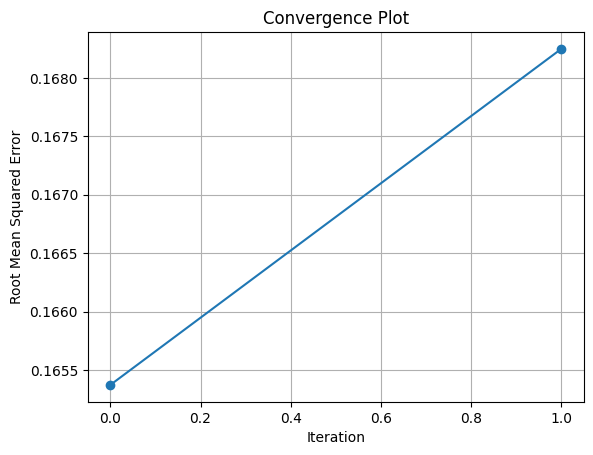

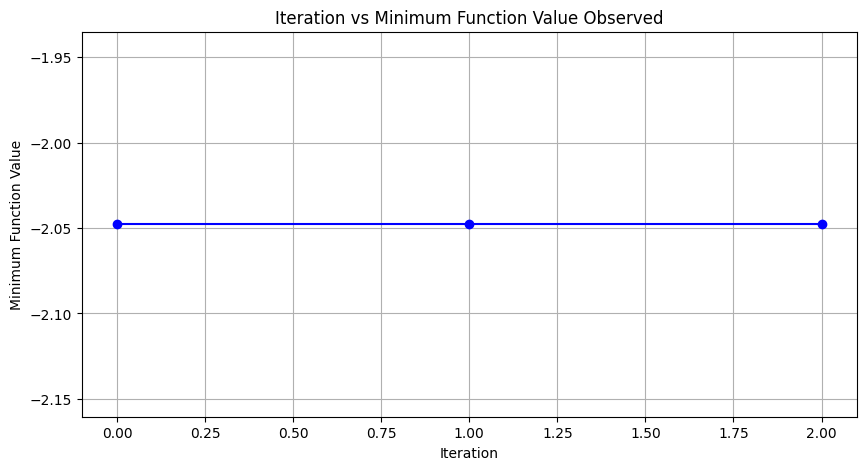

Best observed function value after active learning: -2.047792807692816
Actual global min value is: -2.06261
******
******
******
******
Working on function: Drop Wave
Iteration 1, RMSE: 0.07844846129634868
Iteration 2, RMSE: 0.18811452002234666
Iteration 3, RMSE: 0.09036959304013252
Convergence reached at iteration 3.


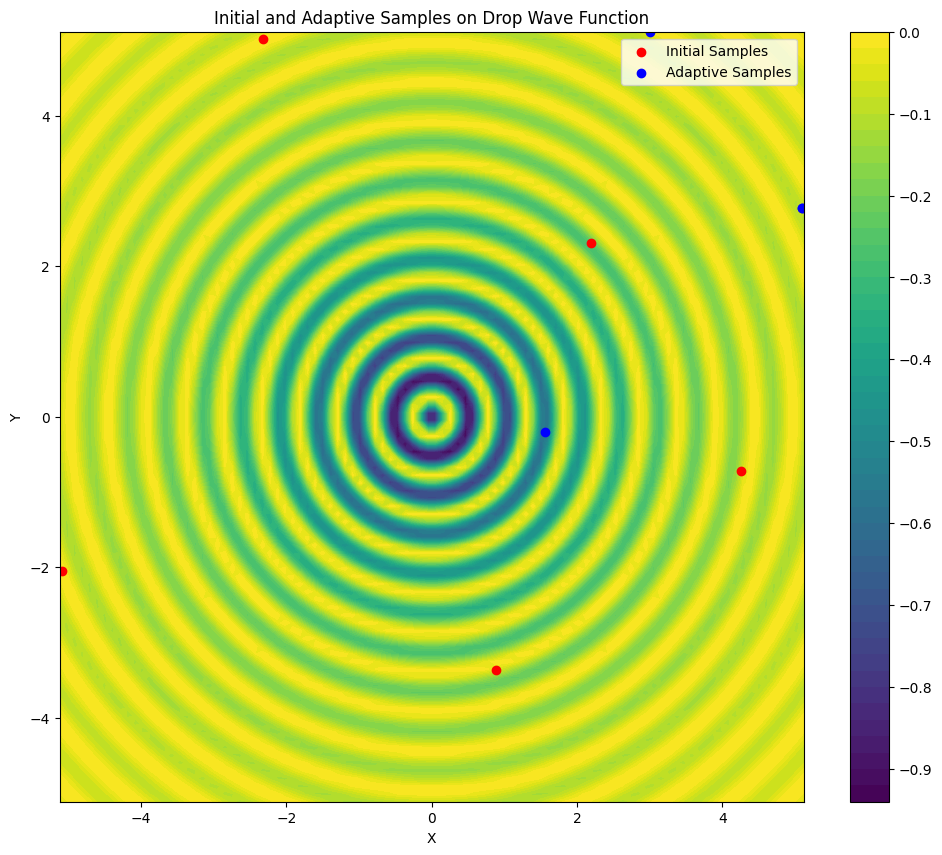

          X         Y
0 -2.324386  5.028729
1  2.198676  2.305806
2 -5.083624 -2.046398
3  0.890145 -3.365620
4  4.257826 -0.726731
5  3.009621  5.111371
6  1.557154 -0.204604
7  5.102738  2.779167
8  5.102738  2.779167


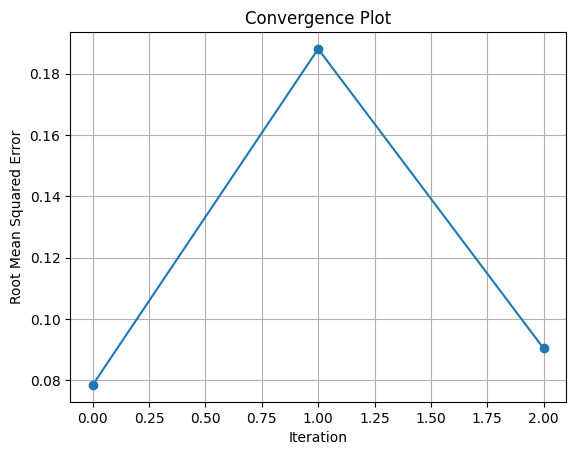

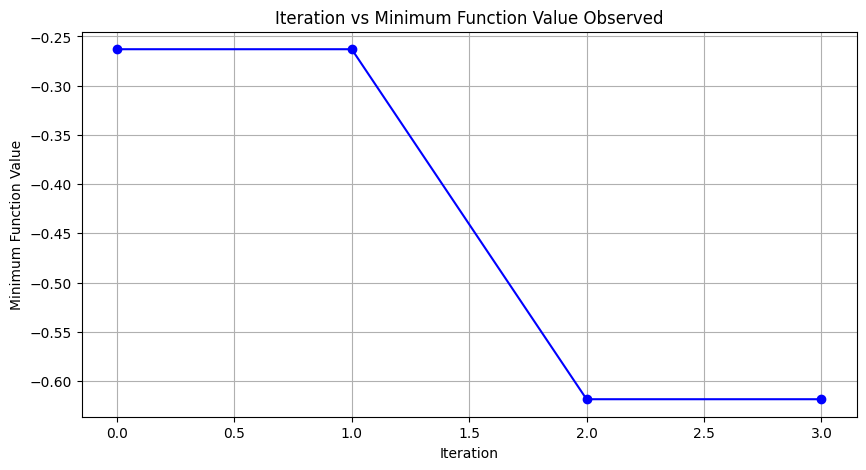

Best observed function value after active learning: -0.6185624571051831
Actual global min value is: -1
******
******
******
******
Working on function: Eggholder
Iteration 1, RMSE: 265.72567625740396
Iteration 2, RMSE: 246.88678773651637
Iteration 3, RMSE: 116.70804812363885
Iteration 4, RMSE: 111.24902665369686
Iteration 5, RMSE: 227.33523824458223
Iteration 6, RMSE: 109.32545788739436
Iteration 7, RMSE: 104.74841799611116
Iteration 8, RMSE: 200.84720785563627
Iteration 9, RMSE: 109.31723799752464
Iteration 10, RMSE: 173.65611526295905
Iteration 11, RMSE: 172.7084542045826
Iteration 12, RMSE: 104.28827223197939
Iteration 13, RMSE: 108.53762590580551
Iteration 14, RMSE: 195.40540700459687
Iteration 15, RMSE: 134.31476245957222
Iteration 16, RMSE: 174.63999860820698
Iteration 17, RMSE: 177.6168473317815
Iteration 18, RMSE: 116.37490830191375
Iteration 19, RMSE: 139.33203587658485
Iteration 20, RMSE: 139.67992792064925
Iteration 21, RMSE: 114.37109937381331
Iteration 22, RMSE: 127.020892

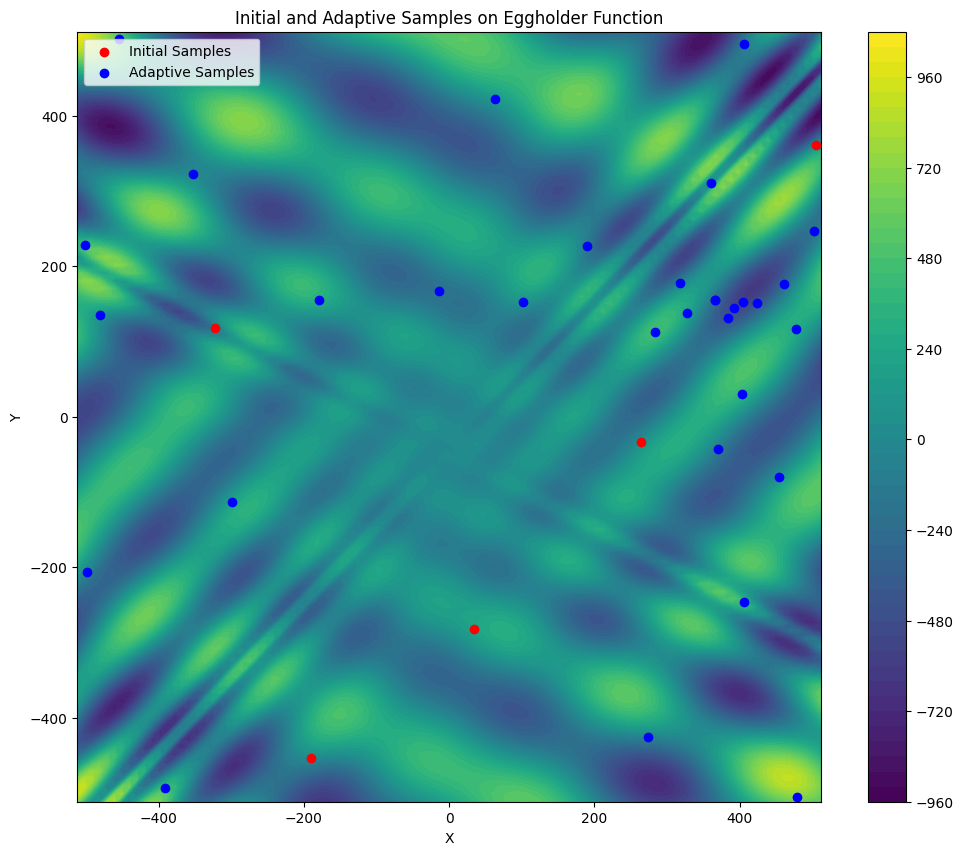

             X           Y
0    34.639454 -282.405912
1   263.592641  -33.457139
2   504.660092  360.944611
3  -322.464067  117.980804
4  -190.133667 -454.085093
5  -454.054498  502.978723
6  -498.493468 -207.123024
7  -298.797620 -112.825690
8  -352.024286  322.139145
9   479.050781 -505.809557
10 -391.670063 -493.981950
11   63.506444  422.733021
12  404.766341  152.975280
13  273.109965 -425.493044
14  405.484381 -246.086790
15  -13.519856  167.539013
16  453.576395  -80.086087
17  189.860650  227.643939
18  282.723752  112.538546
19 -500.724005  227.782974
20  326.786127  137.443054
21 -481.061978  135.737735
22  318.172118  177.740669
23  391.422602  145.121591
24  423.709908  151.200057
25  102.197929  152.093803
26  403.693392   30.827784
27  405.678599  495.856135
28  383.600316  131.039782
29  476.903968  116.067908
30  369.542581  -43.251810
31  360.474124  310.426738
32 -179.600640  155.009724
33  502.626026  247.341126
34  460.932197  176.521643
35  365.874316  154.665130
3

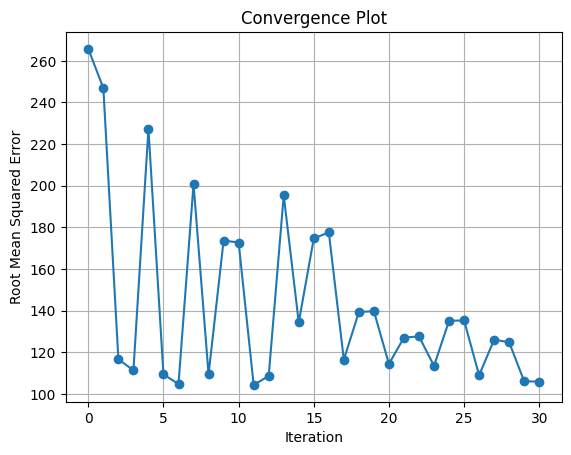

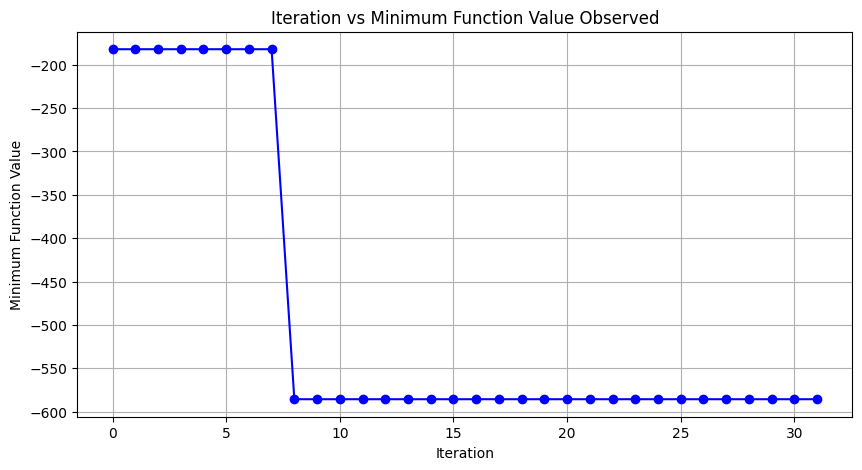

Best observed function value after active learning: -585.7514237534358
Actual global min value is: -959.6407
******
******
******
******
Working on function: Gramacy Lee
Iteration 1, RMSE: 1.6022867775336838
Iteration 2, RMSE: 1.4851250845362352
Iteration 3, RMSE: 0.48323877764097306
Iteration 4, RMSE: 0.46129935202074734
Convergence reached at iteration 4.


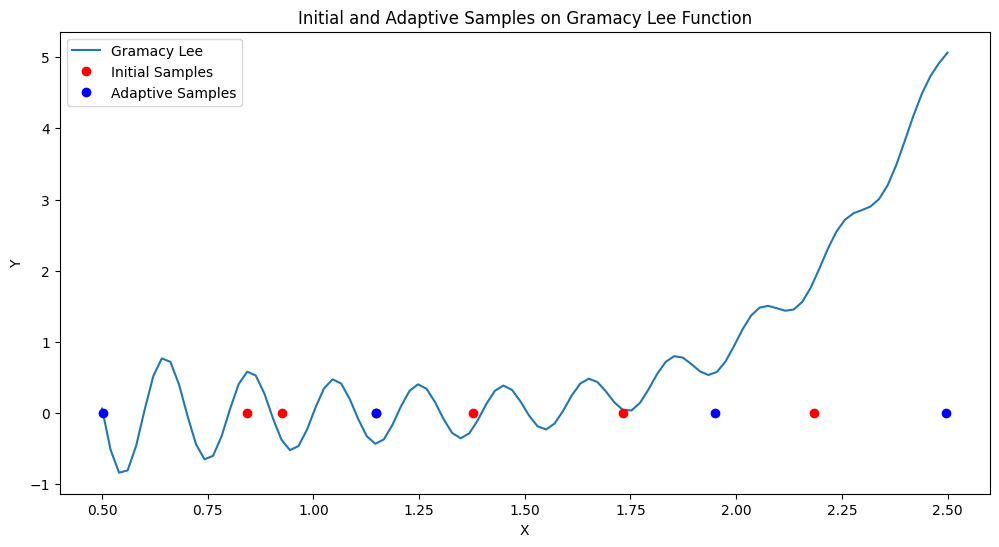

          X
0  0.843802
1  2.185126
2  1.378460
3  1.733046
4  0.925278
5  2.497169
6  1.950575
7  0.502732
8  1.147611
9  1.147611


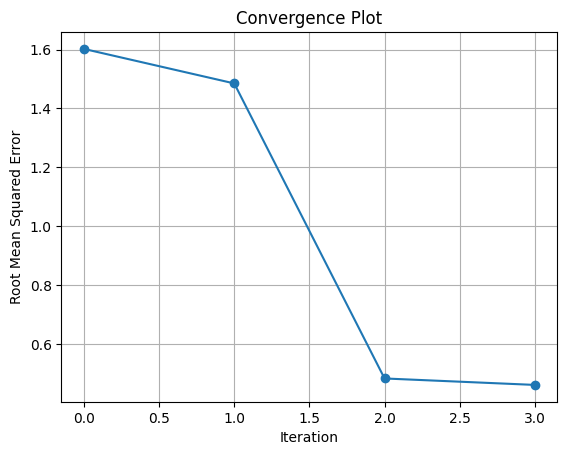

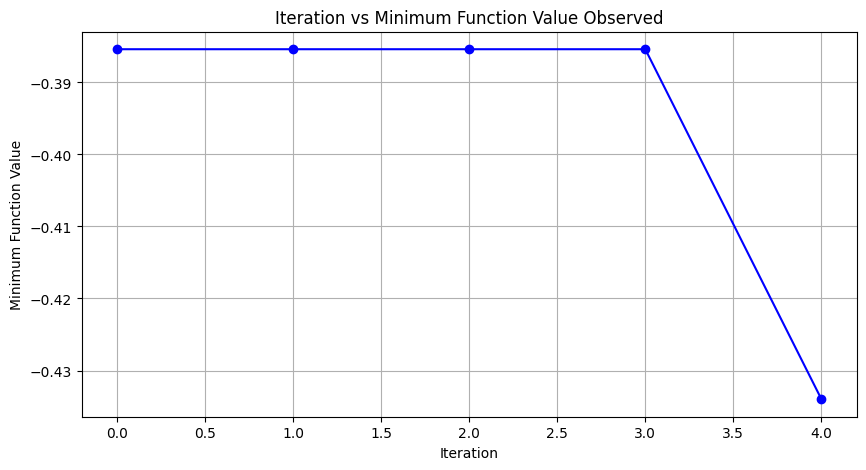

Best observed function value after active learning: -0.433986707049075
Actual global min value is: -0.869
******
******
******
******
Working on function: Holder Table
Iteration 1, RMSE: 1.6571575105165508
Iteration 2, RMSE: 2.0929088958240745
Iteration 3, RMSE: 1.7030357768557003
Iteration 4, RMSE: 1.7310841519106566
Convergence reached at iteration 4.


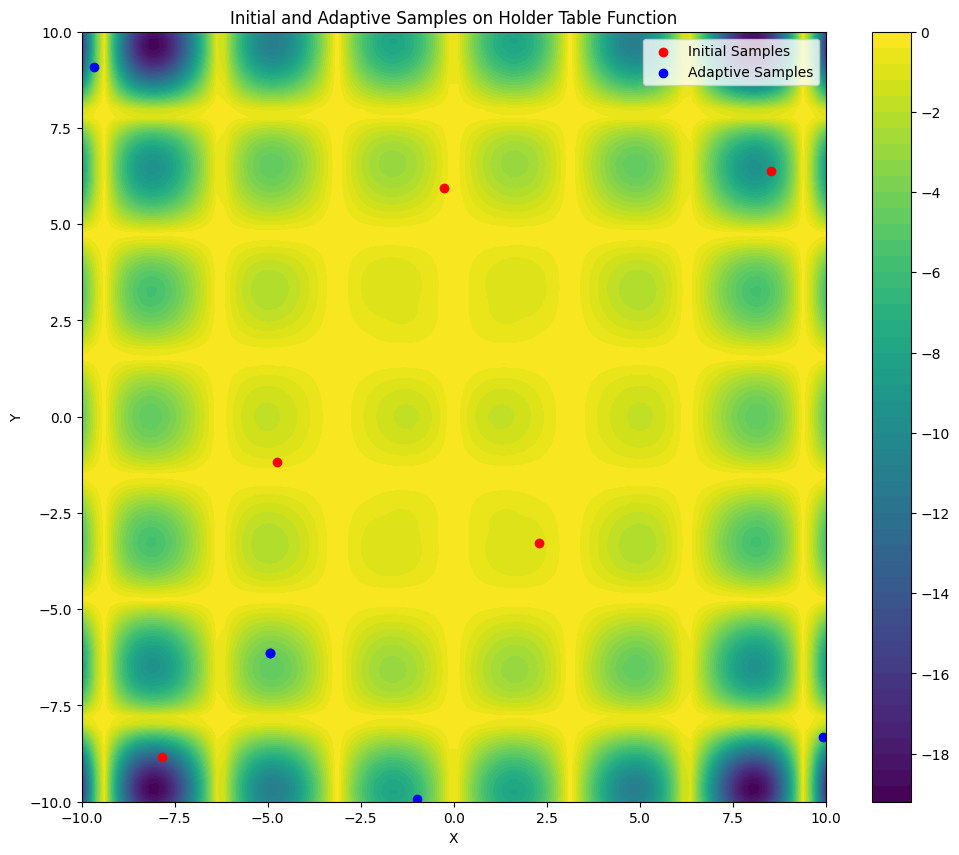

          X         Y
0 -7.838833 -8.829476
1 -4.742191 -1.185622
2  8.525928  6.390022
3 -0.256340  5.936407
4  2.300781 -3.289782
5 -9.679598  9.094541
6  9.931813 -8.325221
7 -0.994738 -9.937942
8 -4.925968 -6.146356
9 -4.925968 -6.146356


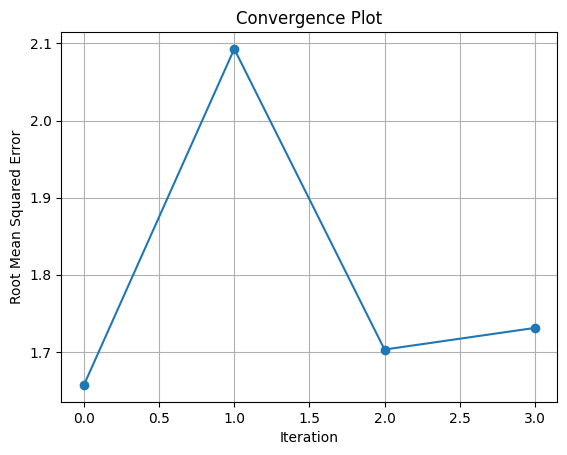

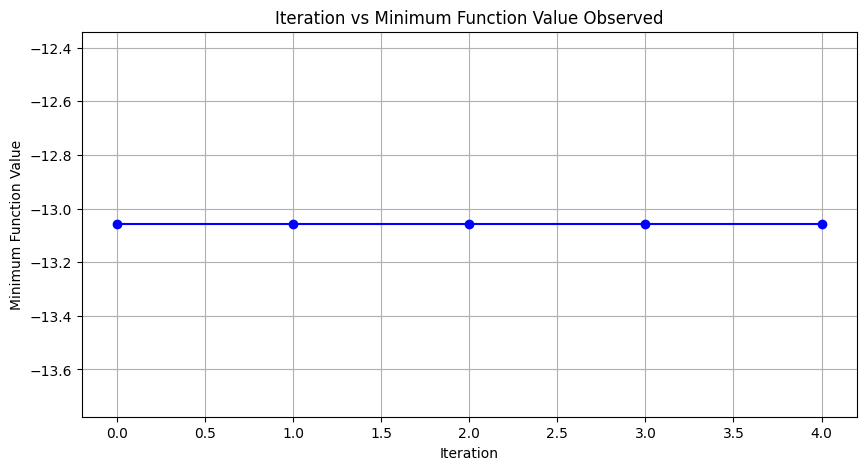

Best observed function value after active learning: -13.058325043895099
Actual global min value is: -19.2085
******
******
******
******
Working on function: Schaffer2
Iteration 1, RMSE: 0.07989691965685852
Iteration 2, RMSE: 0.07712414321997423
Convergence reached at iteration 2.


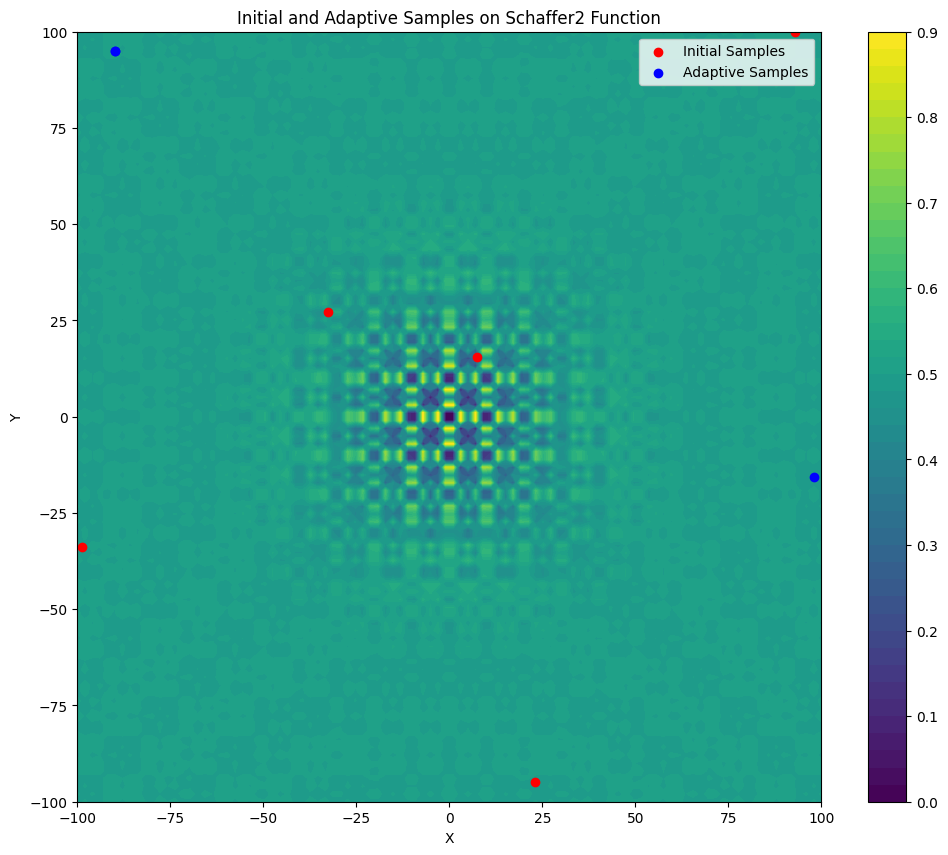

           X          Y
0  22.931667 -94.935990
1   7.492840  15.389486
2  92.886572  99.919588
3 -32.570948  27.138857
4 -98.839111 -33.935585
5  97.949896 -15.642137
6 -89.782156  95.104134
7 -89.782156  95.104134


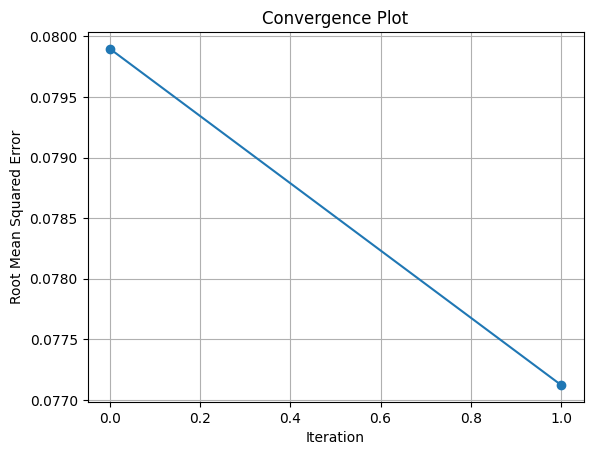

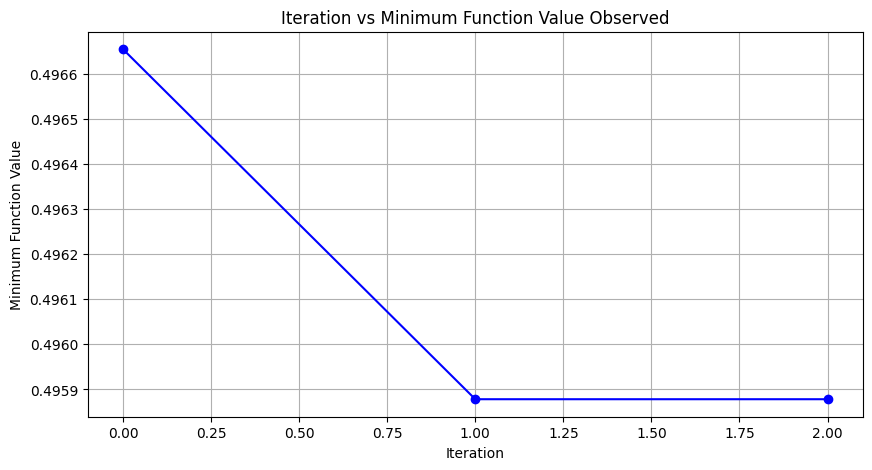

Best observed function value after active learning: 0.49587826701182813
Actual global min value is: 0
******
******
******
******
Working on function: Schaffer4
Iteration 1, RMSE: 0.017620584545058996
Iteration 2, RMSE: 0.02071245334784722
Convergence reached at iteration 2.


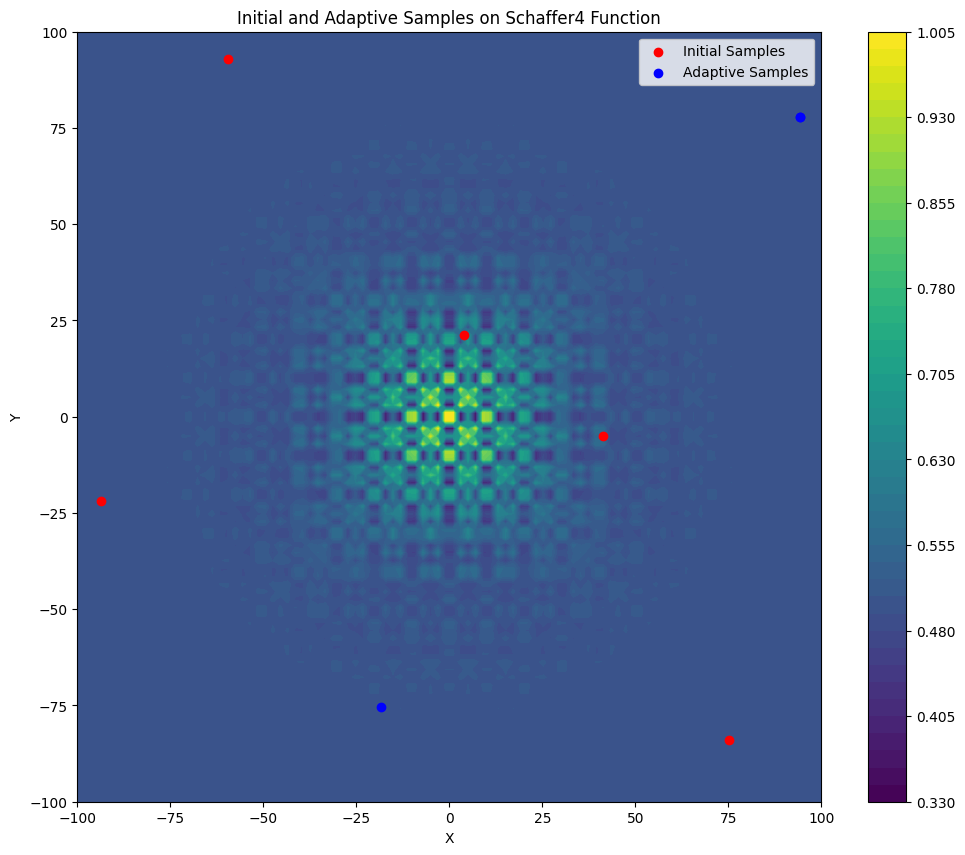

           X          Y
0  41.380187  -4.995893
1 -93.711247 -21.781225
2  75.272574 -83.973265
3   4.045940  21.301532
4 -59.560086  92.855453
5 -18.287150 -75.281557
6  94.342398  77.810226
7  94.342398  77.810226


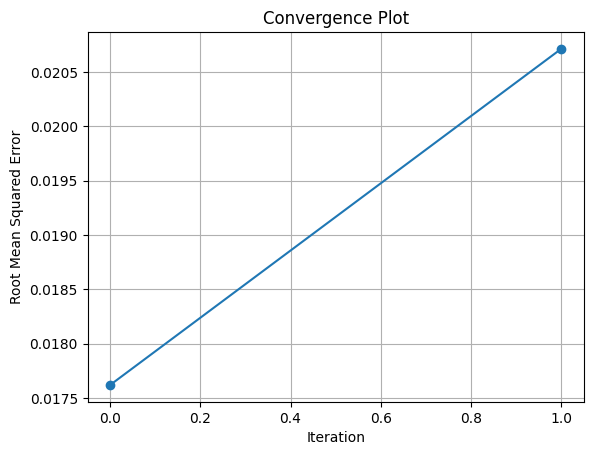

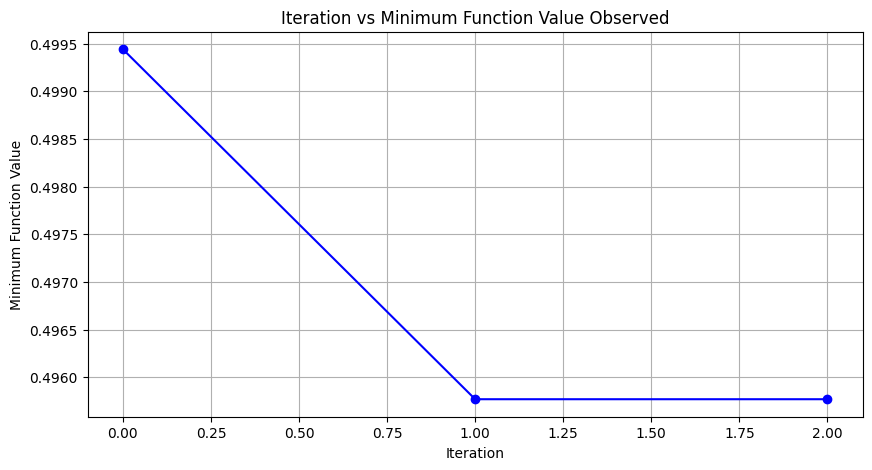

Best observed function value after active learning: 0.49577016141346536
Actual global min value is: 0
******
******
******
******
Working on function: Schwefel
Iteration 1, RMSE: 77.55668623635883
Iteration 2, RMSE: 92.10319735580921
Iteration 3, RMSE: 75.37514449772029
Iteration 4, RMSE: 164.12141814257623
Iteration 5, RMSE: 204.93880601037733
Iteration 6, RMSE: 109.3632977594144
Iteration 7, RMSE: 104.8578949841446
Iteration 8, RMSE: 141.54239252863948
Iteration 9, RMSE: 95.80570654791299
Iteration 10, RMSE: 106.66705998800589
Iteration 11, RMSE: 110.94538016028231
Iteration 12, RMSE: 81.1883310930155
Iteration 13, RMSE: 80.3623489146211
Iteration 14, RMSE: 98.45091934807799
Iteration 15, RMSE: 110.3064732862952
Iteration 16, RMSE: 118.97985144293197
Iteration 17, RMSE: 117.77265813884571
Iteration 18, RMSE: 97.28808308165775
Iteration 19, RMSE: 152.96901867040242
Iteration 20, RMSE: 150.76309232116938
Iteration 21, RMSE: 99.318600552999
Iteration 22, RMSE: 141.98511134146779
Iterati

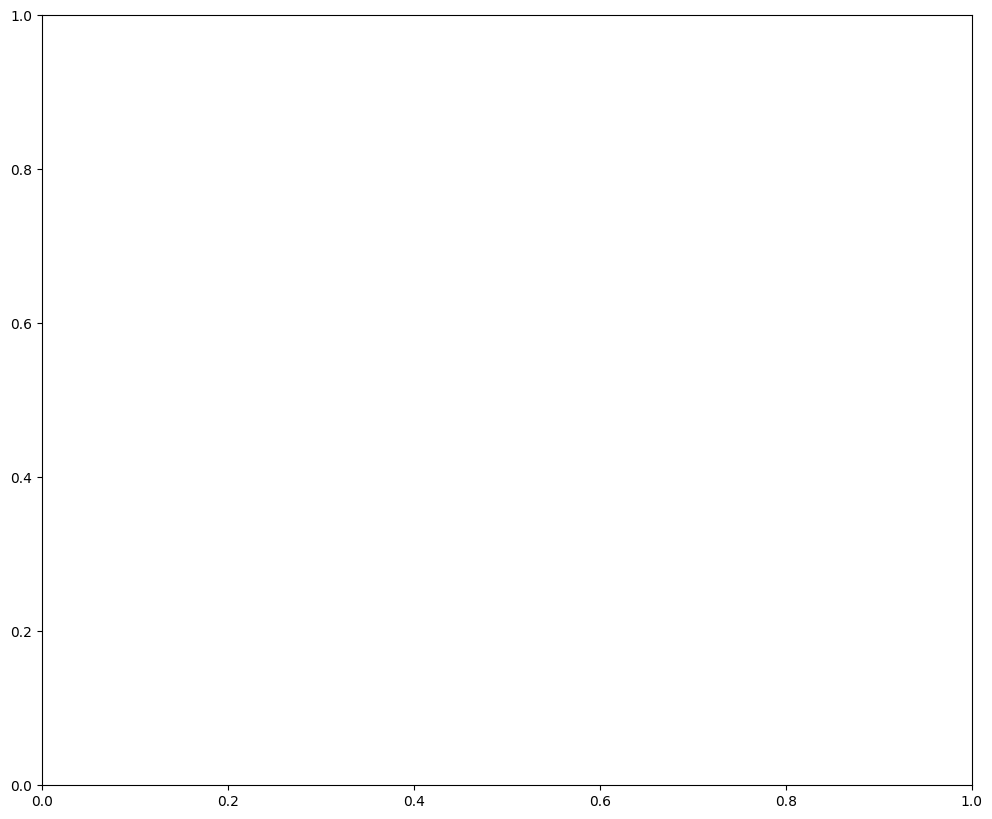

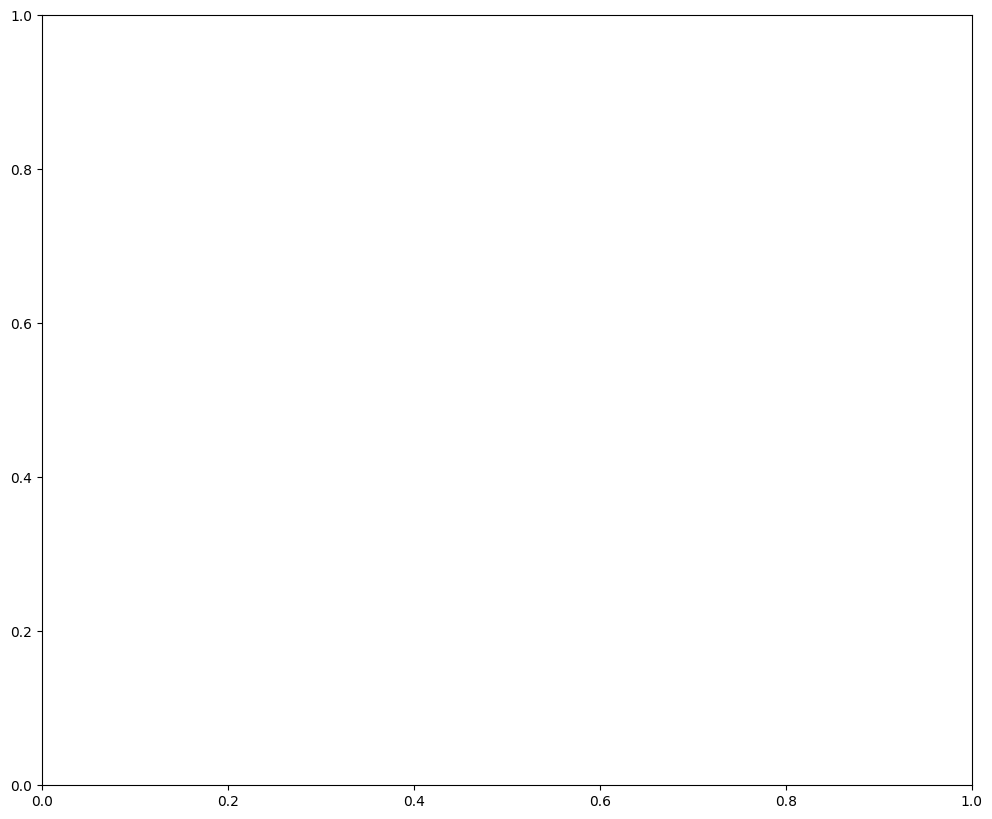

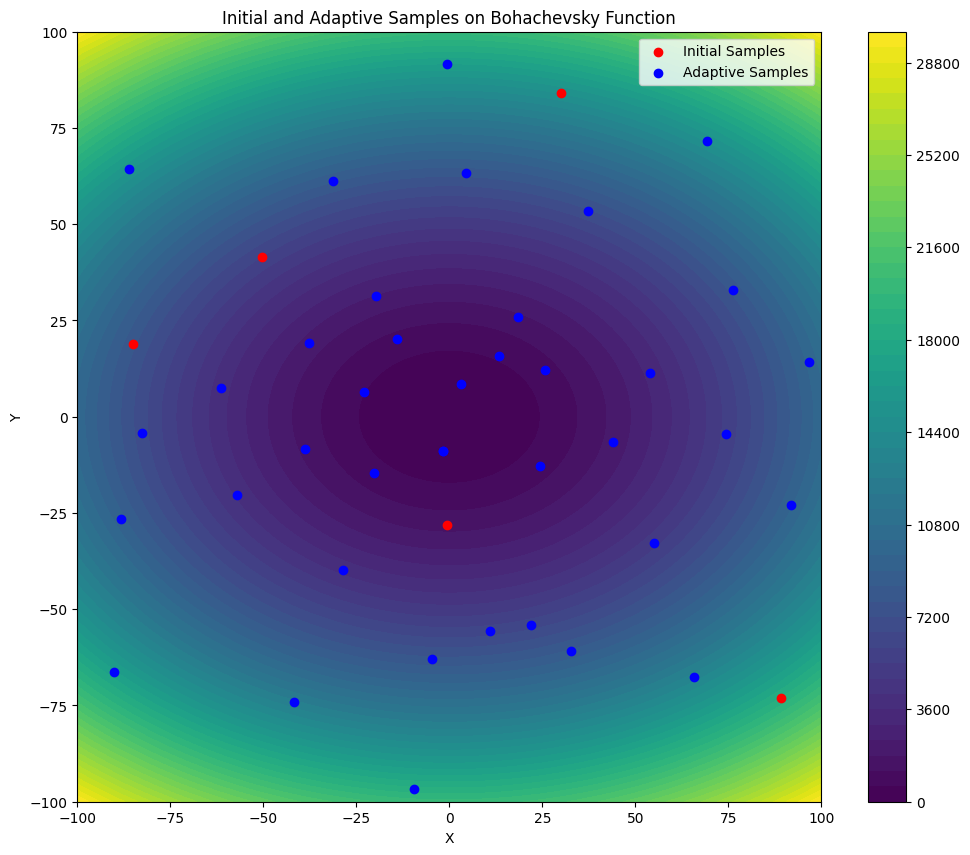

            X          Y
0   89.120951 -73.019864
1   29.941604  84.116956
2  -85.146608  18.889716
3   -0.504757 -28.233126
4  -50.404469  41.437395
5   -9.449306 -96.619493
6  -90.086845 -66.194623
7   -4.624279 -62.831326
8   96.718475  14.134598
9   54.957380 -32.688360
10  18.540983  25.867667
11  22.073035 -54.065314
12  -0.568267  91.507403
13   4.613117  63.375677
14  10.854497 -55.669386
15  32.668483 -60.877267
16  69.283967  71.601908
17 -57.010031 -20.281247
18  37.252571  53.464278
19  54.057831  11.482695
20  91.832419 -23.046965
21 -88.369206 -26.671609
22 -41.766672 -73.971667
23 -22.960627   6.345110
24  24.299538 -12.904445
25 -86.060401  64.289220
26 -28.490733 -39.896828
27   3.117219   8.475428
28 -31.264098  61.131321
29  74.348665  -4.422532
30 -19.794092  31.232322
31 -61.232980   7.577190
32  25.818735  12.037054
33  76.259397  32.800448
34 -20.186186 -14.586357
35  13.278764  15.665546
36  65.780449 -67.723886
37 -38.725078  -8.359987
38 -37.835697  19.151341


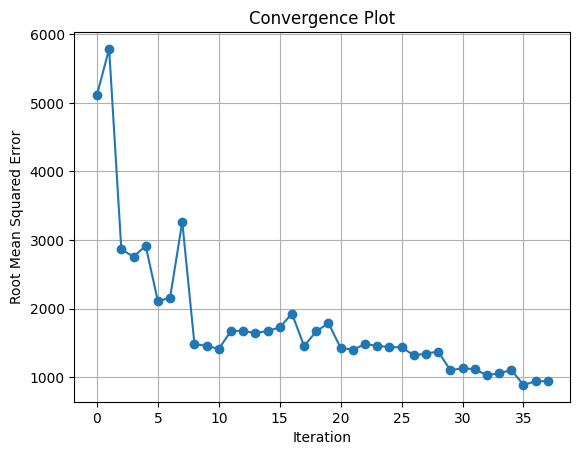

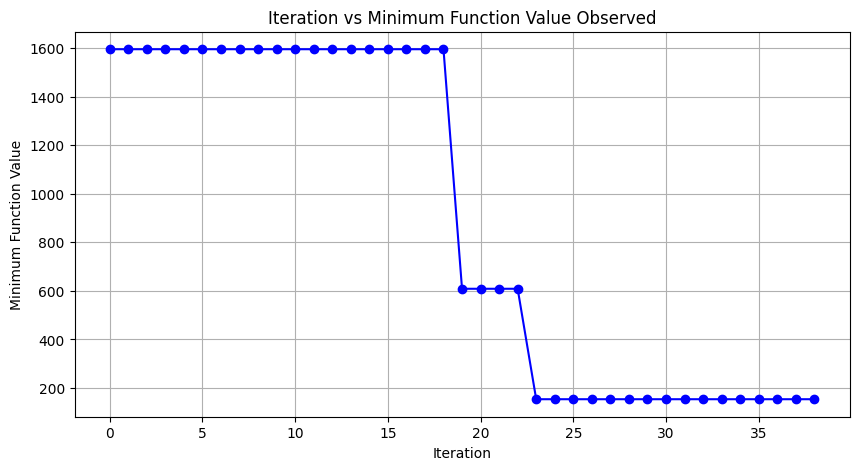

Best observed function value after active learning: 153.8365197372972
Actual global min value is: 0
******
******
******
******
Working on function: Rotated Hyper Ellipsoid
Iteration 1, RMSE: 4532.093844979916
Iteration 2, RMSE: 4208.169551049787
Iteration 3, RMSE: 1556.3350343941327
Iteration 4, RMSE: 3564.999441277663
Iteration 5, RMSE: 3416.3275655963434
Iteration 6, RMSE: 2028.2540672826428
Iteration 7, RMSE: 3086.5882550657607
Iteration 8, RMSE: 3335.569159183005
Iteration 9, RMSE: 1974.2259623322682
Iteration 10, RMSE: 1934.5754366303295
Iteration 11, RMSE: 1980.440701492489
Iteration 12, RMSE: 1585.3681187666282
Iteration 13, RMSE: 1628.6584124943727
Iteration 14, RMSE: 1661.2833769452695
Iteration 15, RMSE: 1401.327790413402
Iteration 16, RMSE: 1476.7211083621687
Iteration 17, RMSE: 1450.330533240308
Iteration 18, RMSE: 1413.7483501072975
Iteration 19, RMSE: 1408.3486320168029
Iteration 20, RMSE: 1423.456353744191
Iteration 21, RMSE: 1377.0962082420806
Iteration 22, RMSE: 1356.

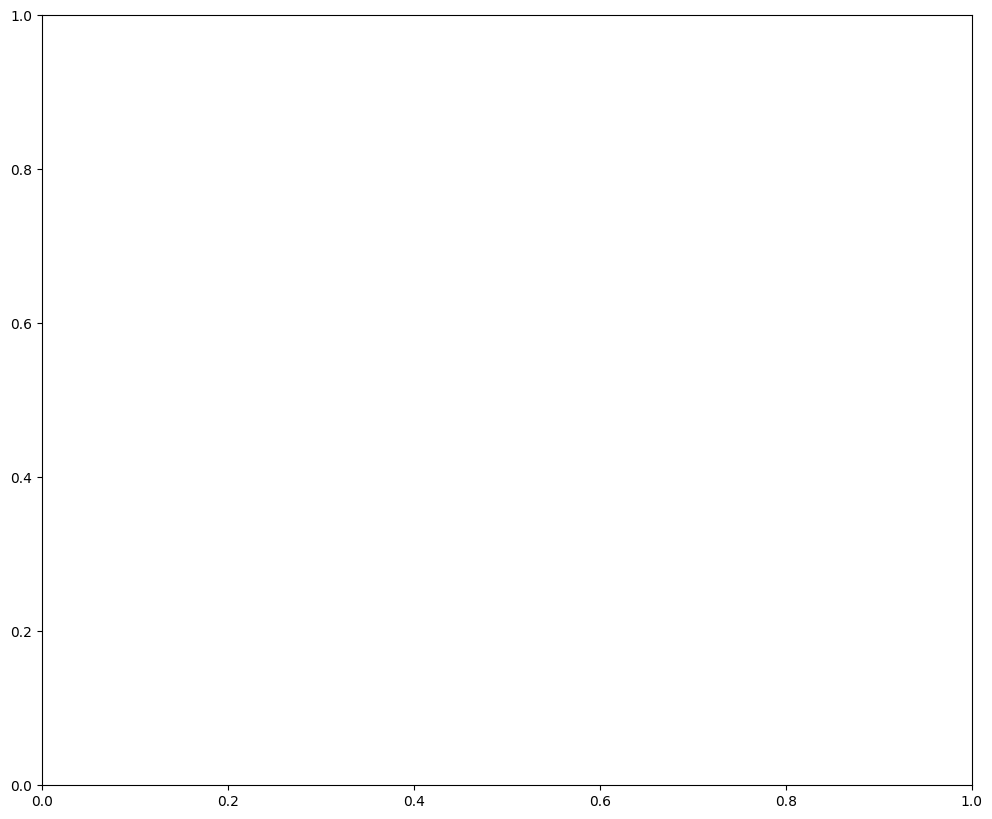

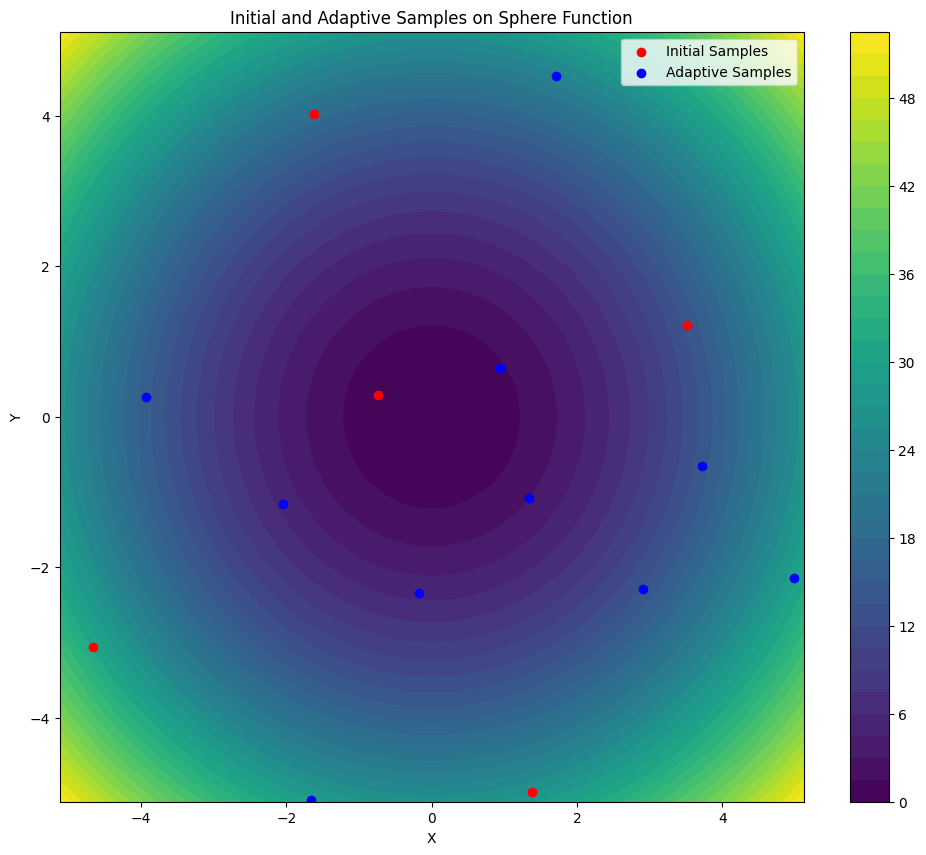

           X         Y
0   1.382652 -4.996415
1  -4.656137 -3.066322
2   3.519442  1.224163
3  -0.738940  0.289916
4  -1.621547  4.021232
5  -3.937834  0.257546
6   1.336677 -1.078623
7  -2.039845 -1.156138
8  -0.175608 -2.346945
9   4.990376 -2.142579
10  1.714033  4.536224
11 -1.664602 -5.096677
12  3.722115 -0.651229
13  2.908394 -2.294591
14  0.937333  0.645873
15  0.937333  0.645873


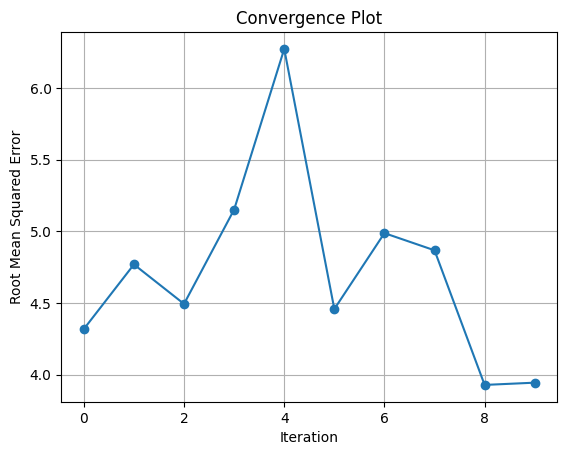

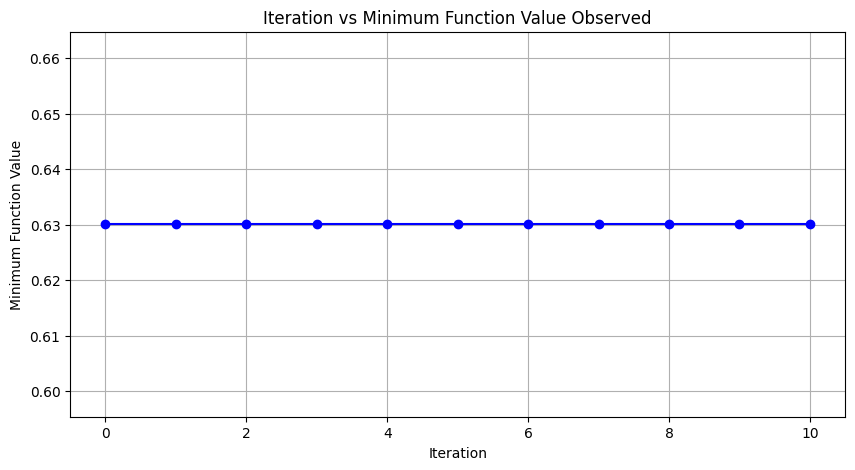

Best observed function value after active learning: 0.6300842968801705
Actual global min value is: 0
******
******
******
******
Working on function: Sum of Different Powers
Iteration 1, RMSE: 0.5503046067929668
Iteration 2, RMSE: 0.6428104049697626
Convergence reached at iteration 2.


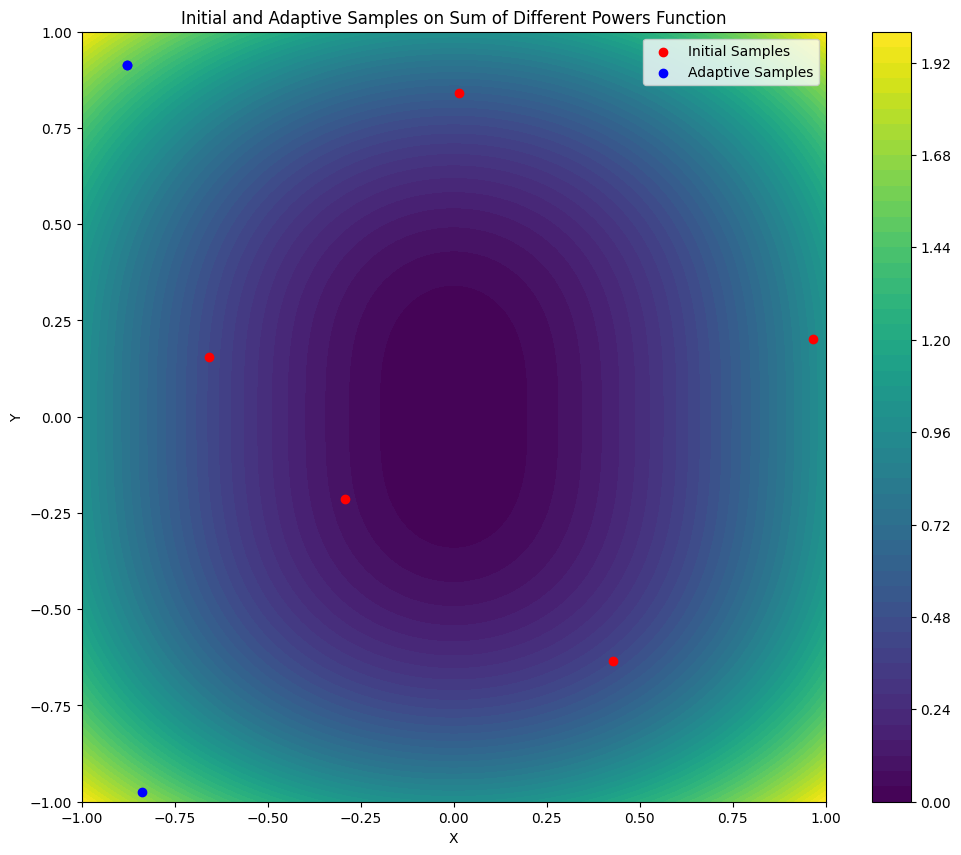

          X         Y
0  0.965069  0.201414
1 -0.658721  0.154282
2 -0.293005 -0.214030
3  0.013267  0.841736
4  0.428289 -0.634382
5 -0.838040 -0.975498
6 -0.879075  0.914831
7 -0.879075  0.914831


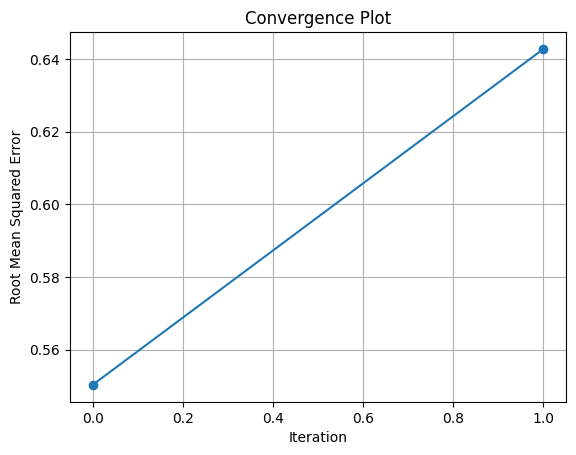

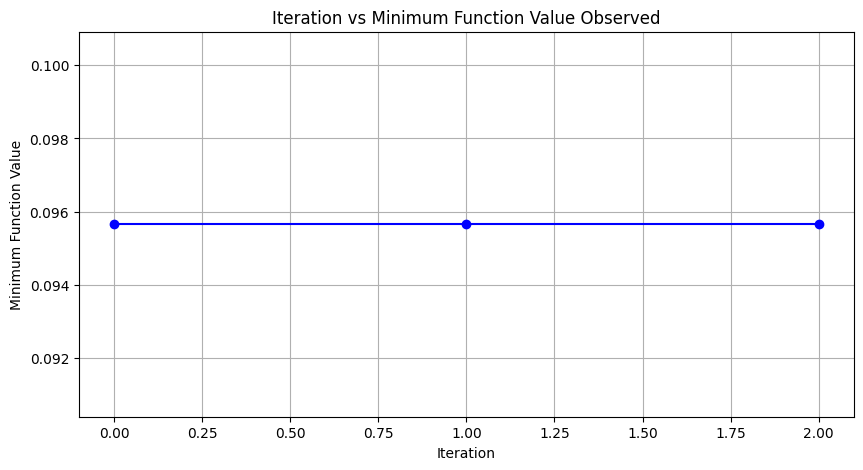

Best observed function value after active learning: 0.09565628109621886
Actual global min value is: 0
******
******
******
******
Working on function: Sum Squares
Iteration 1, RMSE: 78.56756621637965
Iteration 2, RMSE: 73.00973883988159
Iteration 3, RMSE: 37.12635661458681
Iteration 4, RMSE: 47.908103207841485
Iteration 5, RMSE: 55.71216616558056
Iteration 6, RMSE: 24.76597354998995
Iteration 7, RMSE: 27.849688456235558
Iteration 8, RMSE: 27.482708653579547
Iteration 9, RMSE: 21.151882174167945
Iteration 10, RMSE: 21.002358068457614
Iteration 11, RMSE: 22.478133262523396
Iteration 12, RMSE: 18.954606484053148
Iteration 13, RMSE: 18.424257907304604
Iteration 14, RMSE: 18.171589714665018
Iteration 15, RMSE: 14.896804897750009
Iteration 16, RMSE: 15.949812603297106
Iteration 17, RMSE: 15.635503790668993
Iteration 18, RMSE: 13.9762173164697
Iteration 19, RMSE: 14.326057413383872
Iteration 20, RMSE: 15.058755148114228
Iteration 21, RMSE: 14.630843742672734
Iteration 22, RMSE: 14.62810083520

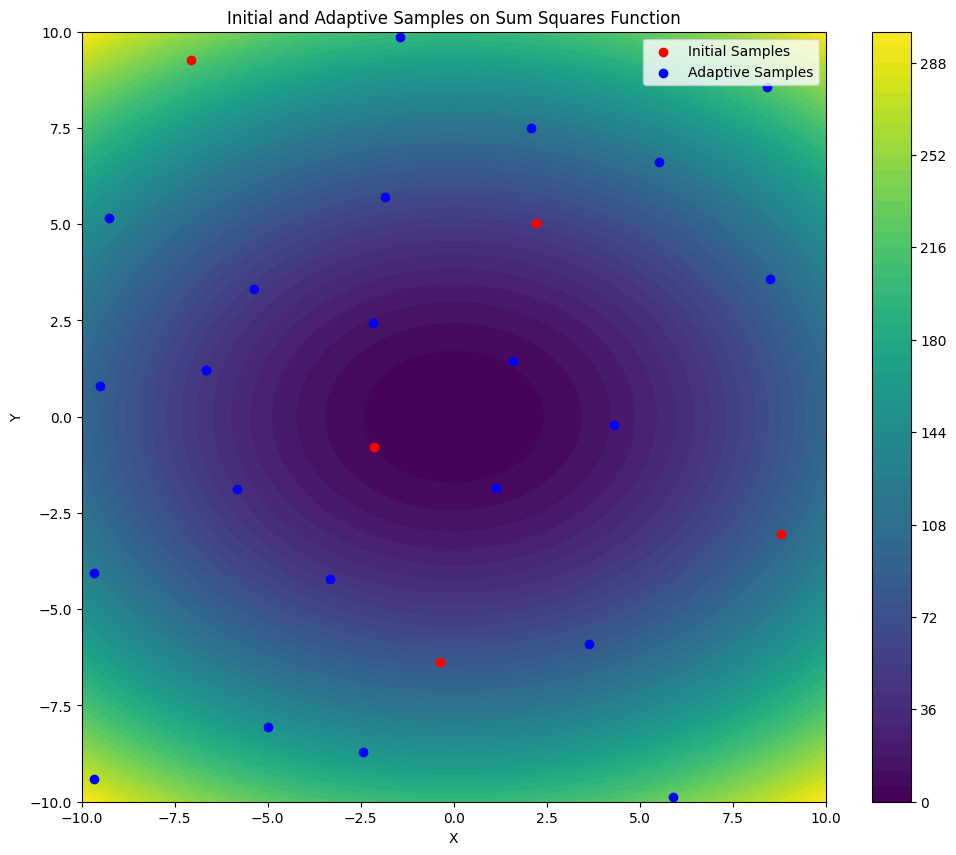

           X         Y
0  -2.140731 -0.777036
1   2.209368  5.020716
2  -7.060116  9.257530
3   8.788699 -3.039684
4  -0.370264 -6.368949
5  -9.670026 -9.417690
6  -9.501097  0.785096
7  -5.354187  3.320923
8  -1.437821  9.858076
9   8.410914  8.564758
10  5.904718 -9.872740
11  4.298070 -0.211378
12  8.500732  3.571023
13 -4.984499 -8.065834
14 -9.655792 -4.061931
15 -9.271902  5.150014
16  5.513765  6.625426
17 -1.842658  5.696796
18  3.648696 -5.902385
19 -5.819982 -1.864726
20  1.137812 -1.847747
21 -2.433576 -8.710887
22 -3.310935 -4.208679
23  1.596927  1.434568
24 -2.159638  2.425009
25  2.084122  7.509828
26 -6.644148  1.210631
27 -6.644148  1.210631


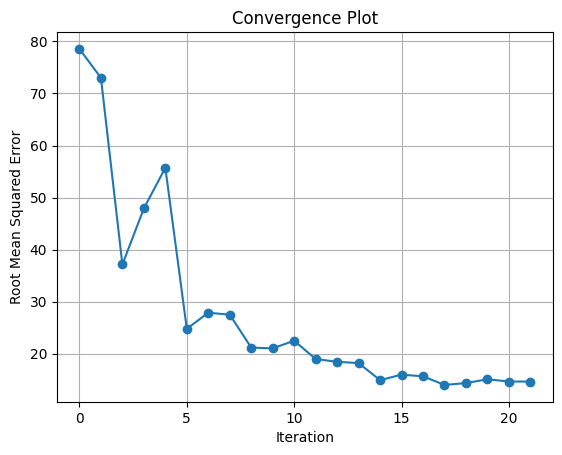

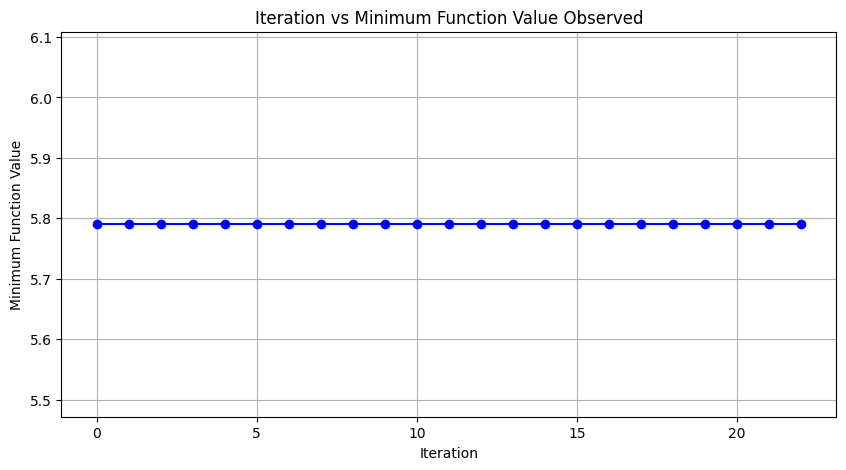

Best observed function value after active learning: 5.790300932693016
Actual global min value is: 0
******
******
******
******
Working on function: Trid
Iteration 1, RMSE: 23.394826488460605
Iteration 2, RMSE: 22.775575566495938
Iteration 3, RMSE: 16.569161212350295
Iteration 4, RMSE: 18.3777391156856
Iteration 5, RMSE: 19.18145567590966
Iteration 6, RMSE: 11.746597241620128
Iteration 7, RMSE: 13.628992744344112
Iteration 8, RMSE: 13.114279051166378
Iteration 9, RMSE: 15.168530763388736
Iteration 10, RMSE: 14.7590665760582
Iteration 11, RMSE: 17.618256333201188
Iteration 12, RMSE: 13.934622847376462
Iteration 13, RMSE: 13.56936073815414
Iteration 14, RMSE: 45.13459208292772
Iteration 15, RMSE: 19.865706326939737
Iteration 16, RMSE: 19.933090356840275
Convergence reached at iteration 16.


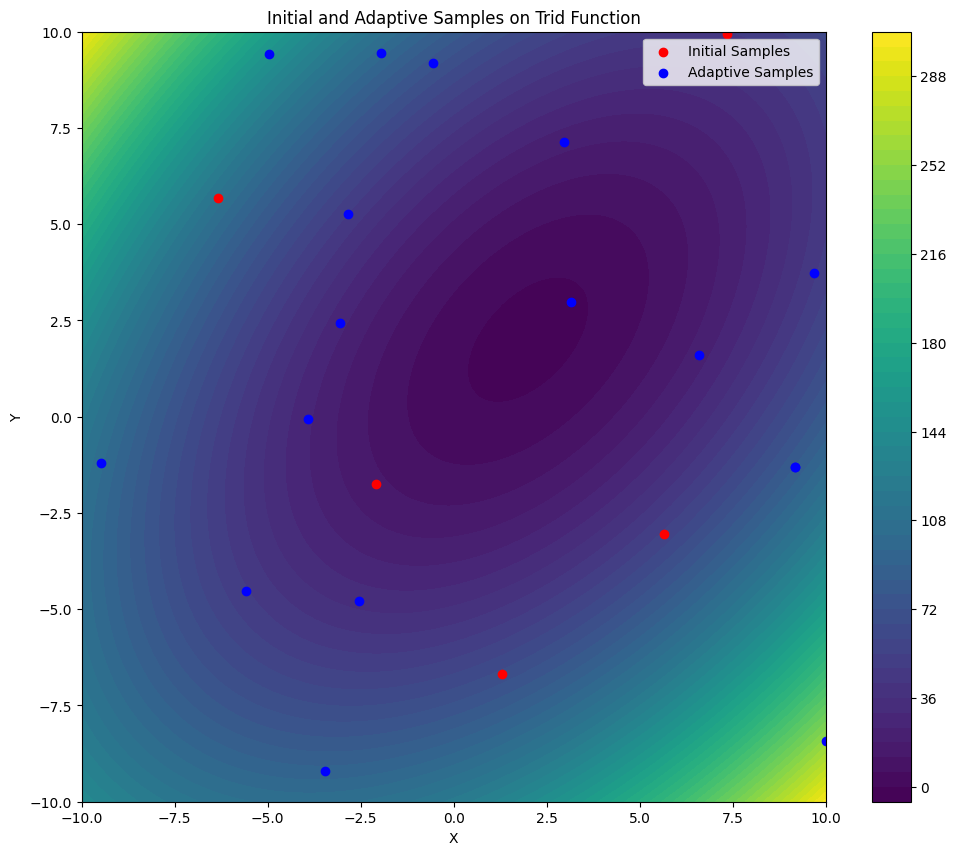

           X         Y
0   7.336379  9.953015
1   5.641943 -3.037891
2  -6.323419  5.688988
3  -2.100636 -1.741751
4   1.297675 -6.685392
5  -3.460922 -9.214520
6  -3.052967  2.442882
7  -0.566203  9.199907
8  -9.479048 -1.203121
9  -5.570252 -4.518857
10 -2.547729 -4.798467
11 -3.925061 -0.061520
12  9.693751  3.734135
13 -4.964308  9.431878
14 -2.844500  5.268545
15 -1.962354  9.459739
16  3.145184  2.992544
17  6.589757  1.596066
18  9.997608 -8.422627
19  2.969089  7.129600
20  9.182802 -1.316963
21  9.182802 -1.316963


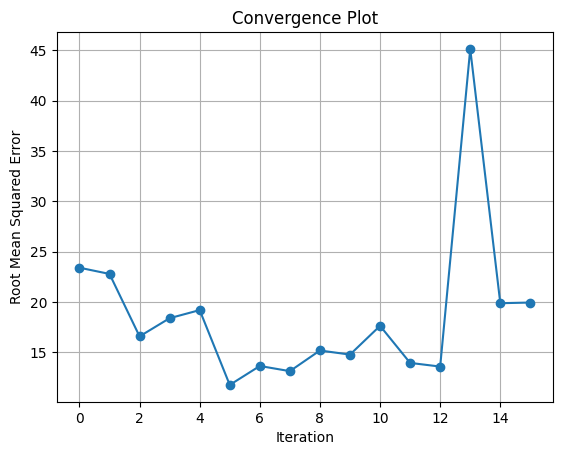

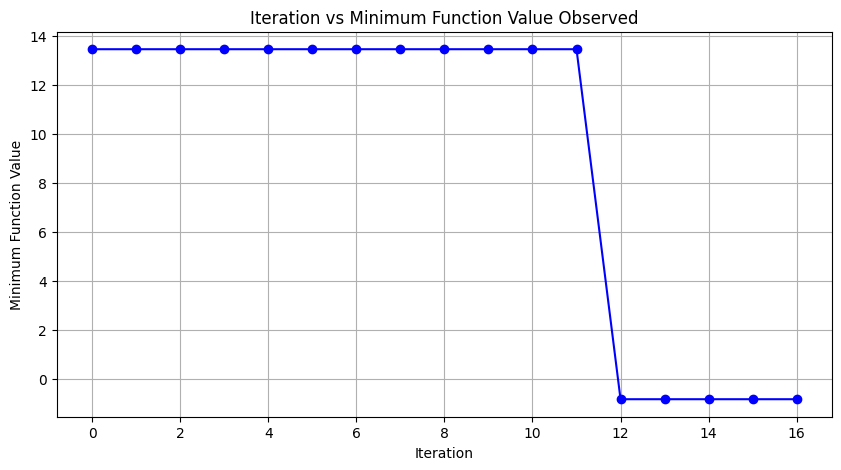

Best observed function value after active learning: -0.8400562113910546
Actual global min value is: -50
******
******
******
******
Working on function: Booth
Iteration 1, RMSE: 165.20015095685116
Iteration 2, RMSE: 154.18607928885615
Iteration 3, RMSE: 150.00413607852911
Iteration 4, RMSE: 163.02851523551203
Iteration 5, RMSE: 174.44909902544322
Iteration 6, RMSE: 118.7402316600424
Iteration 7, RMSE: 113.68601328183223
Iteration 8, RMSE: 228.56719454634302
Iteration 9, RMSE: 126.86805845755195
Iteration 10, RMSE: 126.09127424359953
Iteration 11, RMSE: 134.66046547164575
Iteration 12, RMSE: 90.73578005610186
Iteration 13, RMSE: 104.7829718882532
Iteration 14, RMSE: 112.35525707426241
Iteration 15, RMSE: 91.99176471181455
Iteration 16, RMSE: 95.78460550951476
Iteration 17, RMSE: 96.64973700515411
Iteration 18, RMSE: 90.67436141770483
Iteration 19, RMSE: 90.68532121792721
Convergence reached at iteration 19.


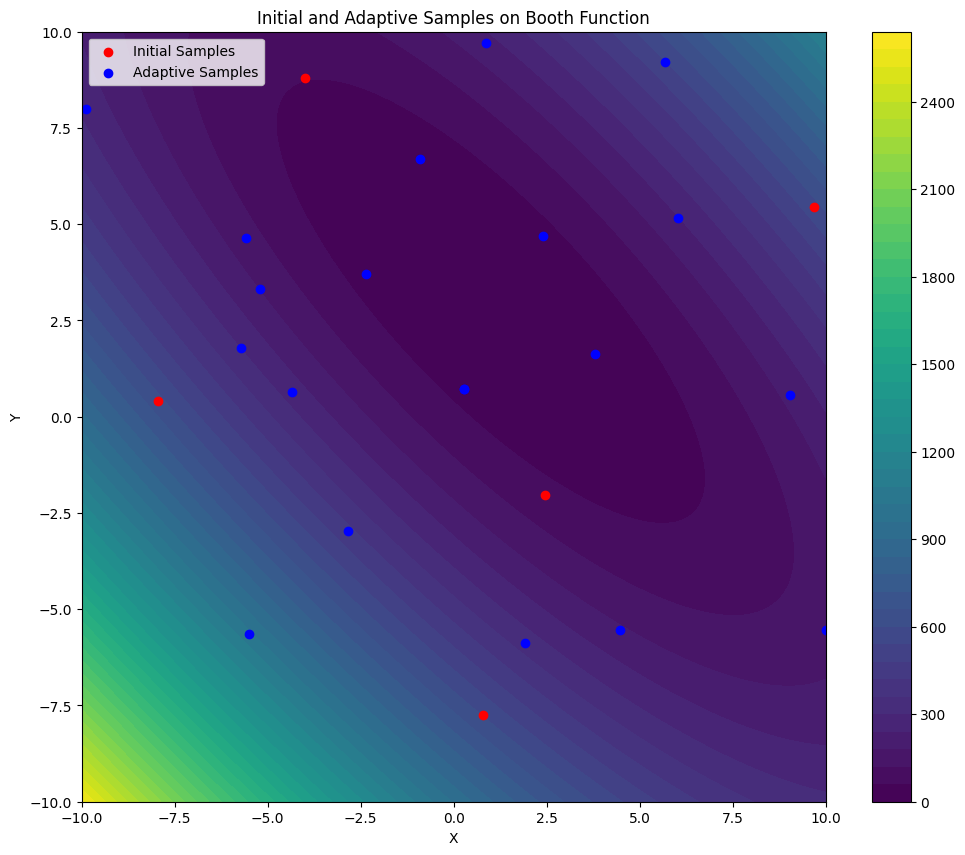

           X         Y
0  -7.960018  0.407177
1   9.676154  5.445532
2   0.780553 -7.759454
3   2.450122 -2.044341
4  -4.005451  8.797665
5   2.403695  4.689248
6  -9.889947  7.993228
7   5.671614  9.203223
8  -2.368533  3.701887
9   9.998354 -5.535571
10  3.810510  1.617131
11 -4.351986  0.651784
12 -5.499601 -5.646860
13  0.858622  9.704901
14  9.045080  0.561977
15 -2.837848 -2.966839
16  4.475687 -5.552238
17 -5.587205  4.647573
18 -5.203618  3.309745
19 -5.706688  1.784726
20 -0.915331  6.689027
21  6.024807  5.155323
22  1.907673 -5.884900
23  0.271012  0.730988
24  0.271012  0.730988


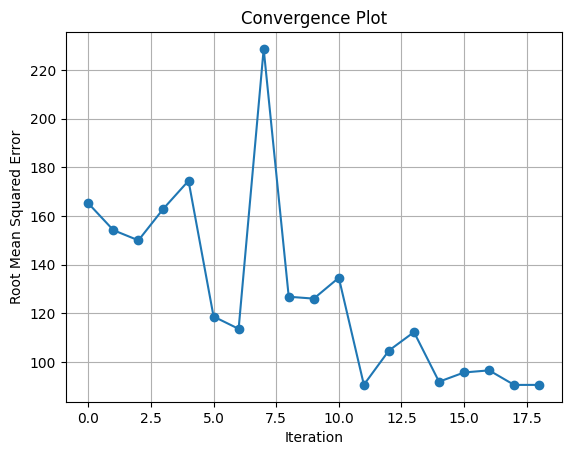

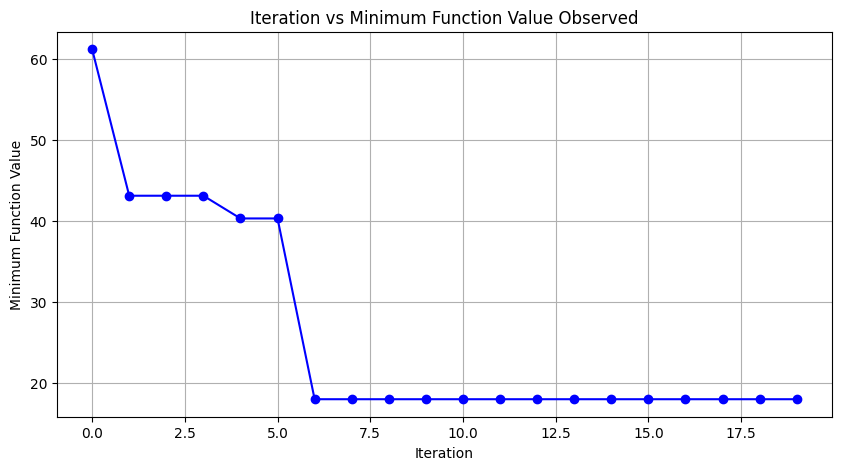

Best observed function value after active learning: 17.96392697568249
Actual global min value is: 0
******
******
******
******
Working on function: Matyas
Iteration 1, RMSE: 7.895570869745276
Iteration 2, RMSE: 7.483222198463135
Iteration 3, RMSE: 13.313705335642863
Iteration 4, RMSE: 13.839630069736028
Iteration 5, RMSE: 13.789536905135089
Convergence reached at iteration 5.


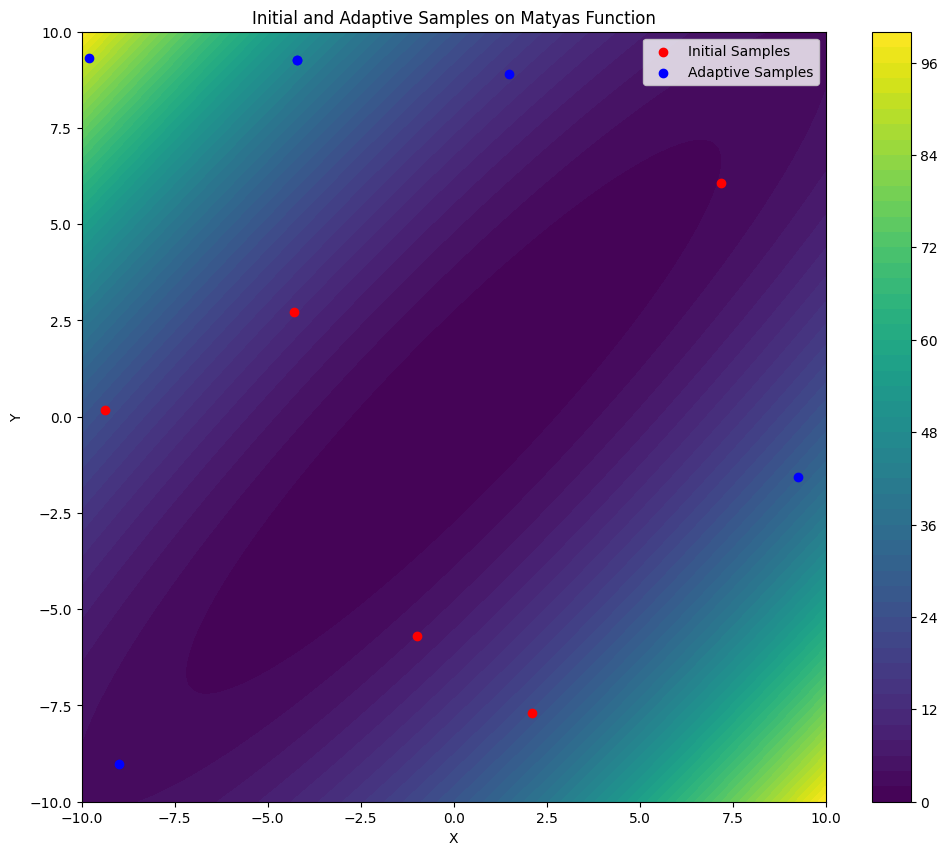

           X         Y
0   2.117501 -7.684892
1  -9.364403  0.184604
2  -0.977491 -5.683217
3  -4.296165  2.711601
4   7.193087  6.082866
5   9.245785 -1.578141
6   1.478101  8.907272
7  -9.807877  9.312805
8  -8.990443 -9.018203
9  -4.199474  9.266240
10 -4.199474  9.266240


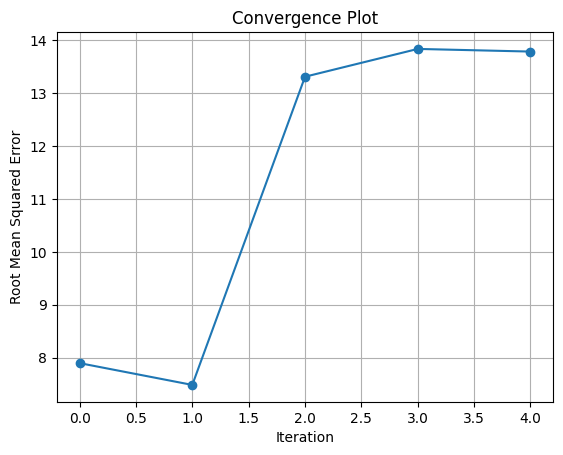

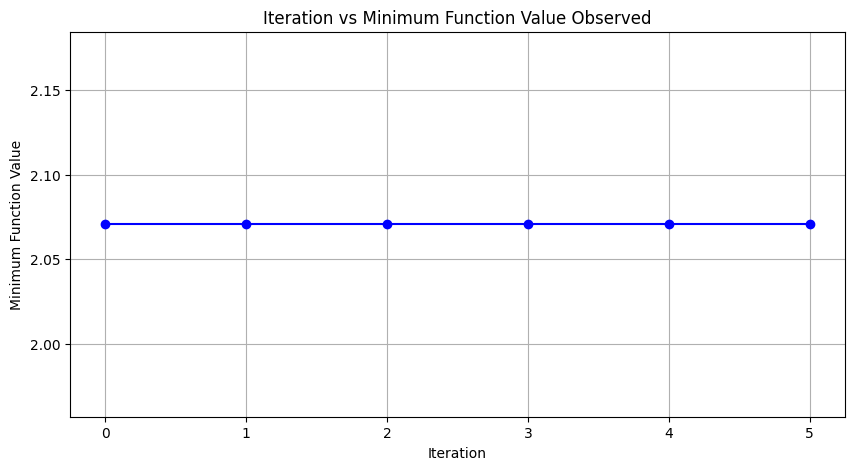

Best observed function value after active learning: 2.0706566002862914
Actual global min value is: 0
******
******
******
******
Working on function: McCormick
Iteration 1, RMSE: 5.576516979694745
Iteration 2, RMSE: 5.2284054614795235
Iteration 3, RMSE: 6.494437764850793
Iteration 4, RMSE: 8.968159476013893
Iteration 5, RMSE: 8.829236216753527
Iteration 6, RMSE: 5.466551094521519
Iteration 7, RMSE: 5.315249728578304
Iteration 8, RMSE: 5.23090982820621
Convergence reached at iteration 8.


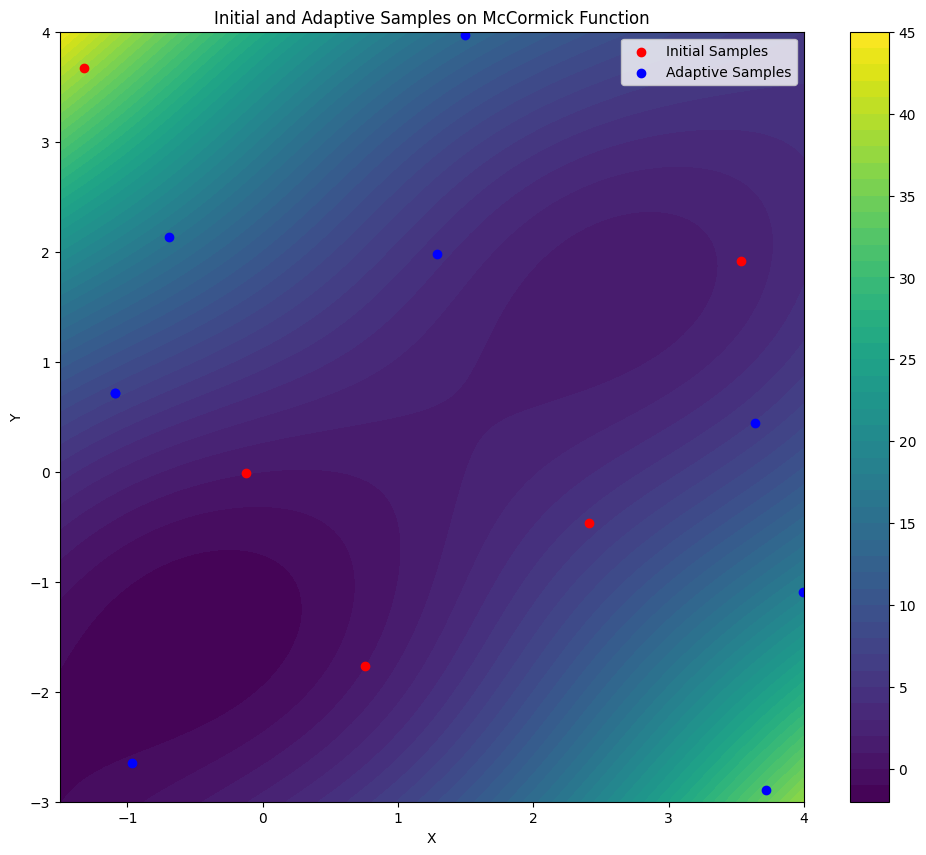

           X         Y
0   3.535723  1.919043
1   0.756811 -1.768249
2   2.409113 -0.464997
3  -1.320376  3.670641
4  -0.123391 -0.007078
5   1.493701  3.969706
6  -0.695439  2.130410
7   3.718882 -2.895565
8  -0.969316 -2.643481
9   3.990948 -1.089433
10  3.640565  0.446779
11  1.288809  1.982025
12 -1.089203  0.714961
13 -1.089203  0.714961


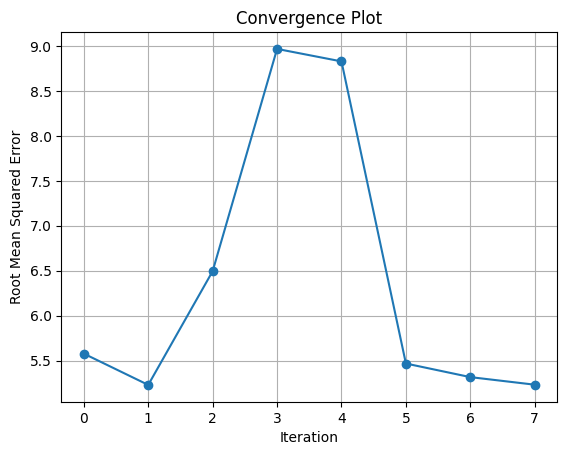

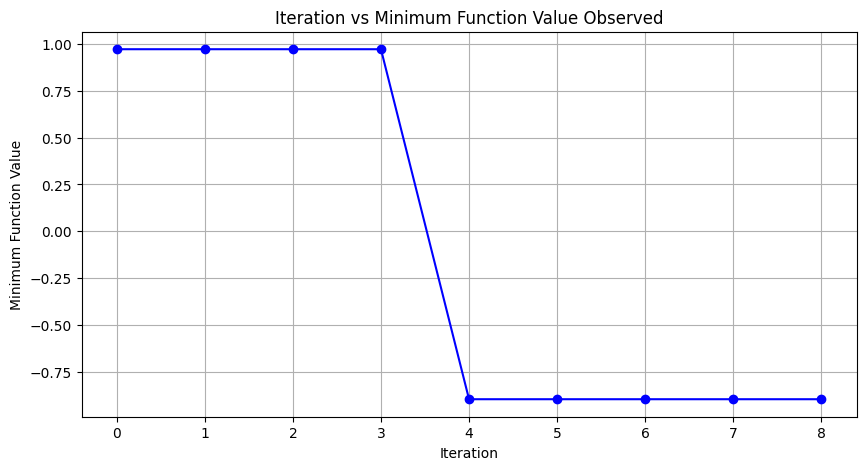

Best observed function value after active learning: -0.8979395579067946
Actual global min value is: -1.9132
******
******
******
******
Working on function: Three Hump Camel
Iteration 1, RMSE: 65.95749970779701
Iteration 2, RMSE: 62.66416814465453
Iteration 3, RMSE: 59.65731114027188
Iteration 4, RMSE: 343.2872937038996
Iteration 5, RMSE: 596.1950586790929
Iteration 6, RMSE: 216.52899199335667
Iteration 7, RMSE: 208.36095161154236
Iteration 8, RMSE: 202.074328262189
Iteration 9, RMSE: 166.8440569567443
Iteration 10, RMSE: 360.41224345880806
Iteration 11, RMSE: 349.37085292187754
Iteration 12, RMSE: 154.55057185100168
Iteration 13, RMSE: 152.48241686890327
Iteration 14, RMSE: 148.42519880304542
Iteration 15, RMSE: 138.17261005949825
Iteration 16, RMSE: 134.8545467426876
Iteration 17, RMSE: 132.7573459315474
Iteration 18, RMSE: 117.55765088252802
Iteration 19, RMSE: 115.17970872734458
Iteration 20, RMSE: 112.86648086887601
Iteration 21, RMSE: 123.46477842091365
Iteration 22, RMSE: 121.30

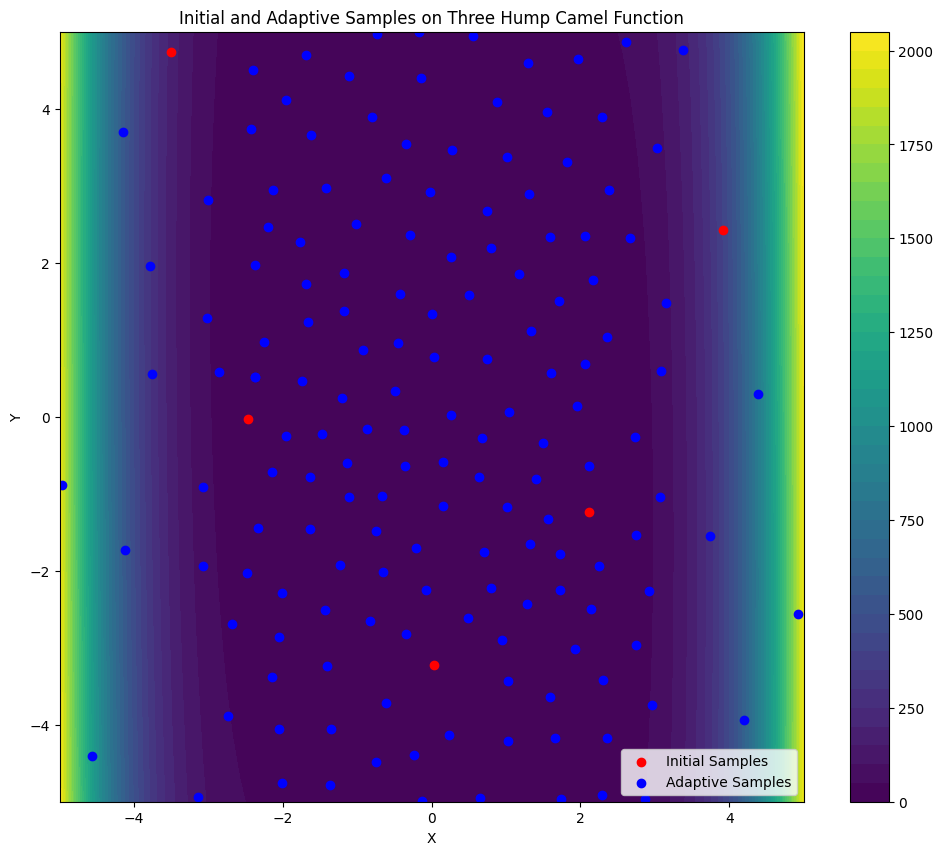

            X         Y
0   -3.507194  4.735438
1    3.912542  2.428232
2    0.028855 -3.218242
3    2.118972 -1.239680
4   -2.463598 -0.034353
..        ...       ...
157  0.799231  2.189746
158 -2.193734  2.467420
159  0.802060 -2.226430
160 -2.367791  0.515960
161 -2.367791  0.515960

[162 rows x 2 columns]


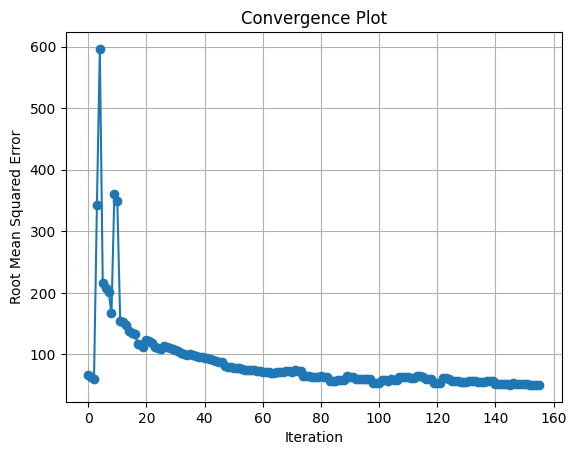

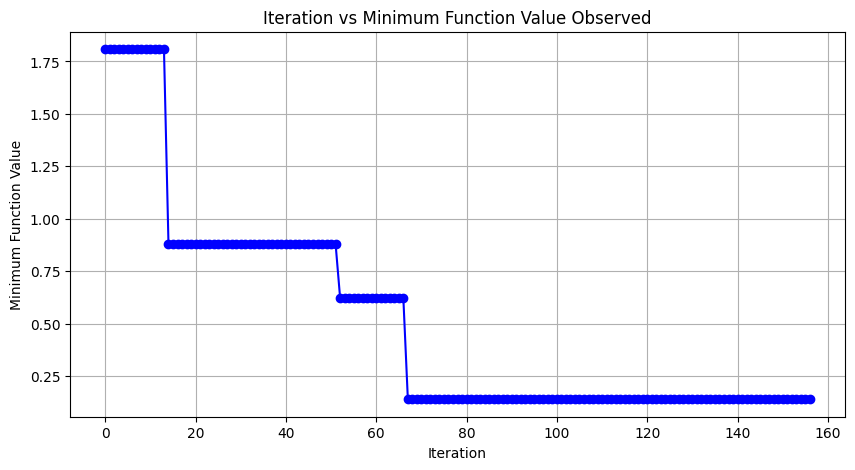

Best observed function value after active learning: 0.13992484468179156
Actual global min value is: 0
******
******
******
******
Working on function: Six Hump Camel
Iteration 1, RMSE: 11.02822532529156
Iteration 2, RMSE: 16.962488681790017
Iteration 3, RMSE: 19.85652930971457
Iteration 4, RMSE: 18.770465348646518
Iteration 5, RMSE: 23.11250241038161
Iteration 6, RMSE: 12.573761681722953
Iteration 7, RMSE: 14.516146652835497
Iteration 8, RMSE: 14.710062024866724
Iteration 9, RMSE: 13.14877703464885
Iteration 10, RMSE: 12.96298708523783
Iteration 11, RMSE: 16.07078654681926
Iteration 12, RMSE: 14.623767365510897
Iteration 13, RMSE: 15.730387640304084
Iteration 14, RMSE: 17.41708723417652
Iteration 15, RMSE: 11.984181167649579
Iteration 16, RMSE: 11.732361041462067
Iteration 17, RMSE: 12.906967390478437
Iteration 18, RMSE: 8.168579050993205
Iteration 19, RMSE: 8.059152988898198
Iteration 20, RMSE: 7.897707825951942
Iteration 21, RMSE: 8.14728356115351
Iteration 22, RMSE: 8.97429956742136

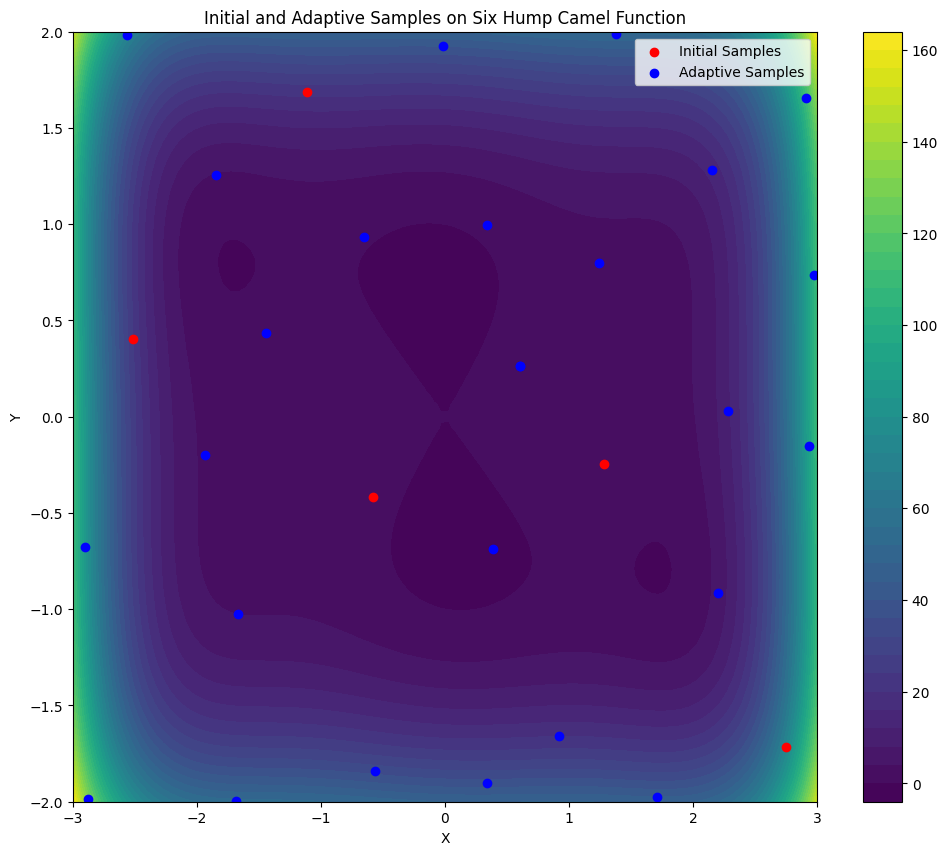

           X         Y
0  -0.578195 -0.417518
1   2.746964 -1.713776
2   1.283573 -0.247361
3  -1.108172  1.688242
4  -2.517654  0.403771
5   0.917871 -1.660818
6   1.381927  1.989283
7  -2.874701 -1.983558
8  -0.563293 -1.842758
9  -2.899105 -0.676073
10  2.976794  0.737657
11 -2.566489  1.981522
12  0.341609  0.995528
13 -1.671306 -1.023014
14 -1.681726 -1.996101
15  2.153440  1.279545
16 -1.443160  0.434549
17  2.279149  0.031339
18  2.202443 -0.913260
19  0.390617 -0.686527
20 -0.653884  0.932380
21  2.932265 -0.150799
22  2.911758  1.653691
23  1.711157 -1.976559
24  1.245005  0.798838
25  0.336495 -1.900814
26 -1.843319  1.253425
27 -1.933032 -0.198152
28 -0.012175  1.923505
29  0.601839  0.261932
30  0.601839  0.261932


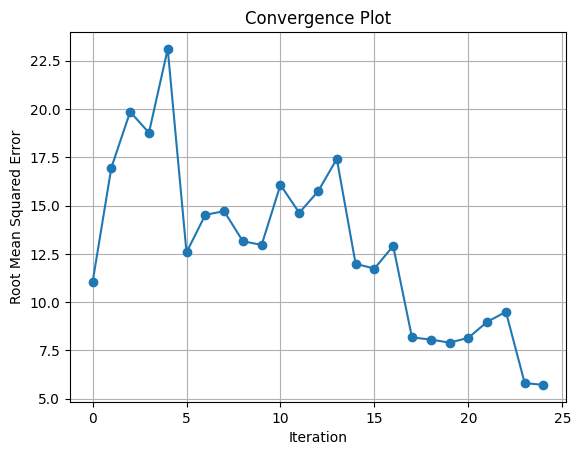

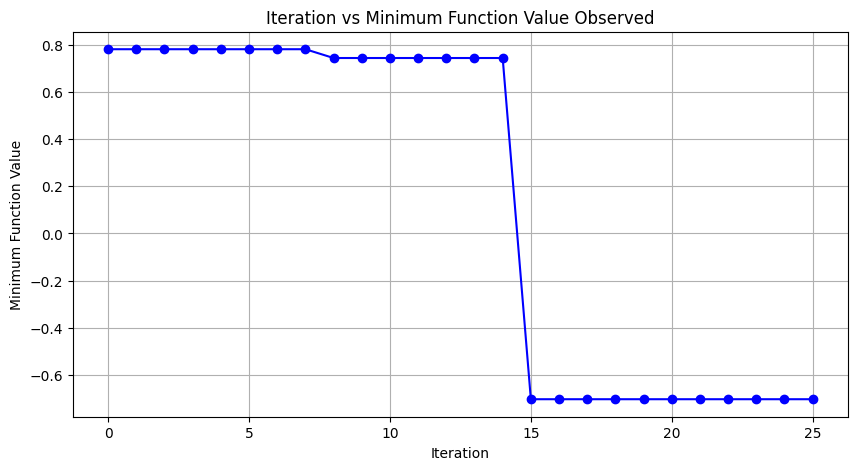

Best observed function value after active learning: -0.702257854408318
Actual global min value is: -1.03163
******
******
******
******
Working on function: Dixon Price
Iteration 1, RMSE: 13168.971890384291
Iteration 2, RMSE: 16796.526059546406
Iteration 3, RMSE: 5406.294527953044
Iteration 4, RMSE: 6983.199786871715
Iteration 5, RMSE: 6765.777827186394
Iteration 6, RMSE: 3348.4196630342603
Iteration 7, RMSE: 4029.430044947098
Iteration 8, RMSE: 3973.665947186701
Iteration 9, RMSE: 2245.6258689647293
Iteration 10, RMSE: 2336.864050429704
Iteration 11, RMSE: 2263.0443722740606
Iteration 12, RMSE: 2484.9513953286587
Iteration 13, RMSE: 2582.8067055275205
Iteration 14, RMSE: 2731.3785801097574
Iteration 15, RMSE: 2180.612953070049
Iteration 16, RMSE: 2128.4714582046468
Iteration 17, RMSE: 2247.557793300379
Iteration 18, RMSE: 2107.9598763982776
Iteration 19, RMSE: 2261.4576336947234
Iteration 20, RMSE: 2216.6627211293226
Iteration 21, RMSE: 1868.6153211528065
Iteration 22, RMSE: 2068.0567

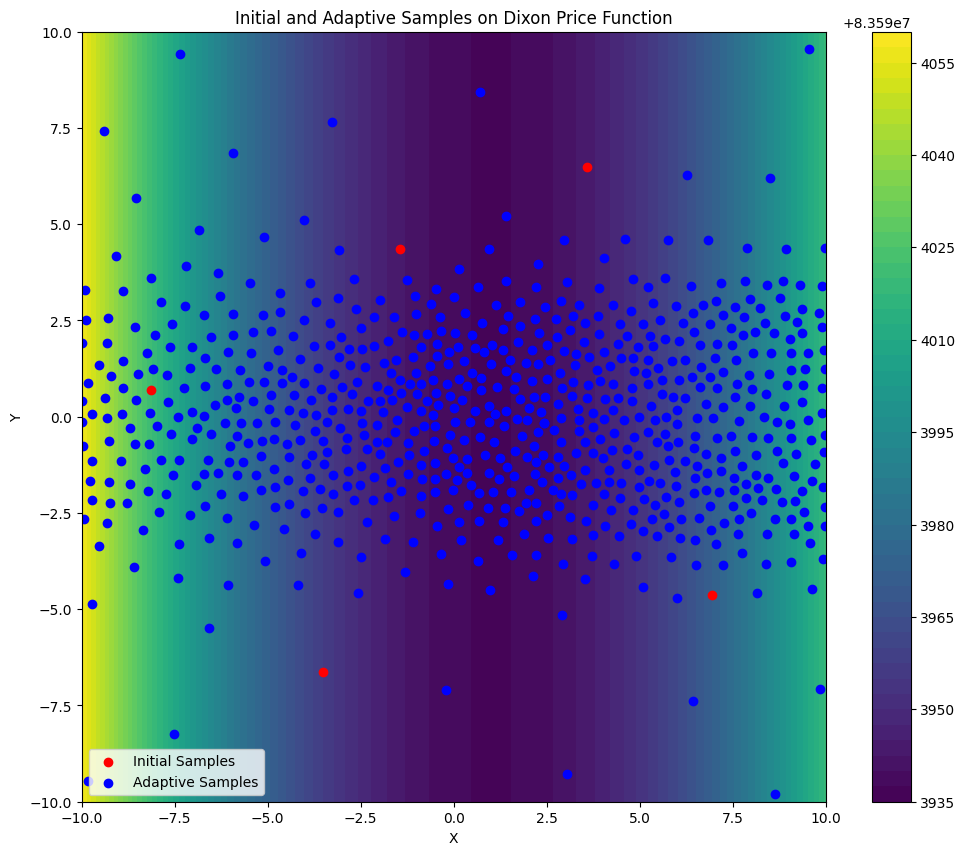

            X         Y
0   -8.142338  0.687711
1   -1.453283  4.350409
2    6.947133 -4.624413
3    3.587679  6.487791
4   -3.524262 -6.617750
..        ...       ...
730 -0.864905  0.858098
731 -1.679491  1.127703
732 -4.439117 -2.269792
733  2.426509 -0.165339
734  2.426509 -0.165339

[735 rows x 2 columns]


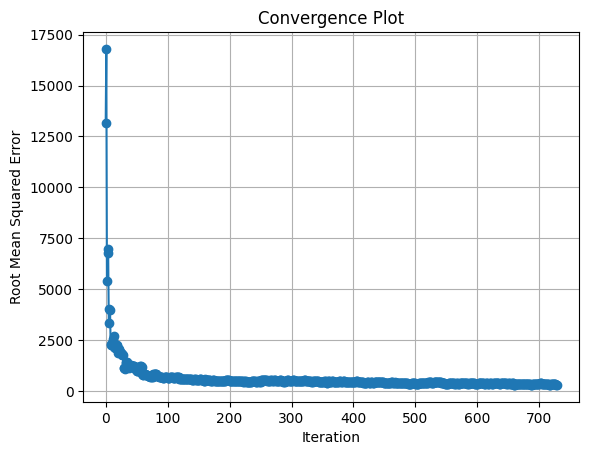

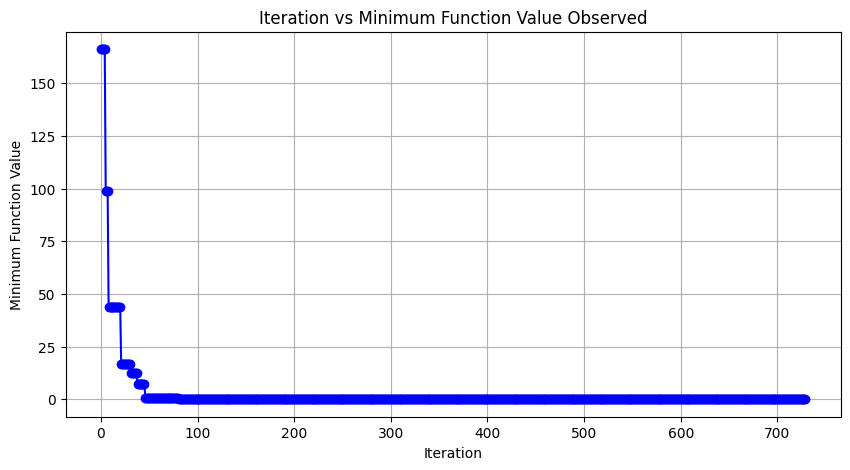

Best observed function value after active learning: 0.029047822924927594
Actual global min value is: 0
******
******
******
******
Working on function: Easom
Iteration 1, RMSE: 0.0
Iteration 2, RMSE: 0.0
Convergence reached at iteration 2.


c:\Users\user\Desktop\ie492\Black-Box-Optimization-in-Simulation-Based-Design\utils\models.py:80: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\user\Desktop\ie492\Black-Box-Optimization-in-Simulation-Based-Design\utils\models.py:88: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\user\Desktop\ie492\Black-Box-Optimization-in-Simulation-Based-Design\utils\models.py:80: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\user\Desktop\ie492\Black-Box-Optimization-in-Simulation-Based-Design\utils\models.py:88: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)


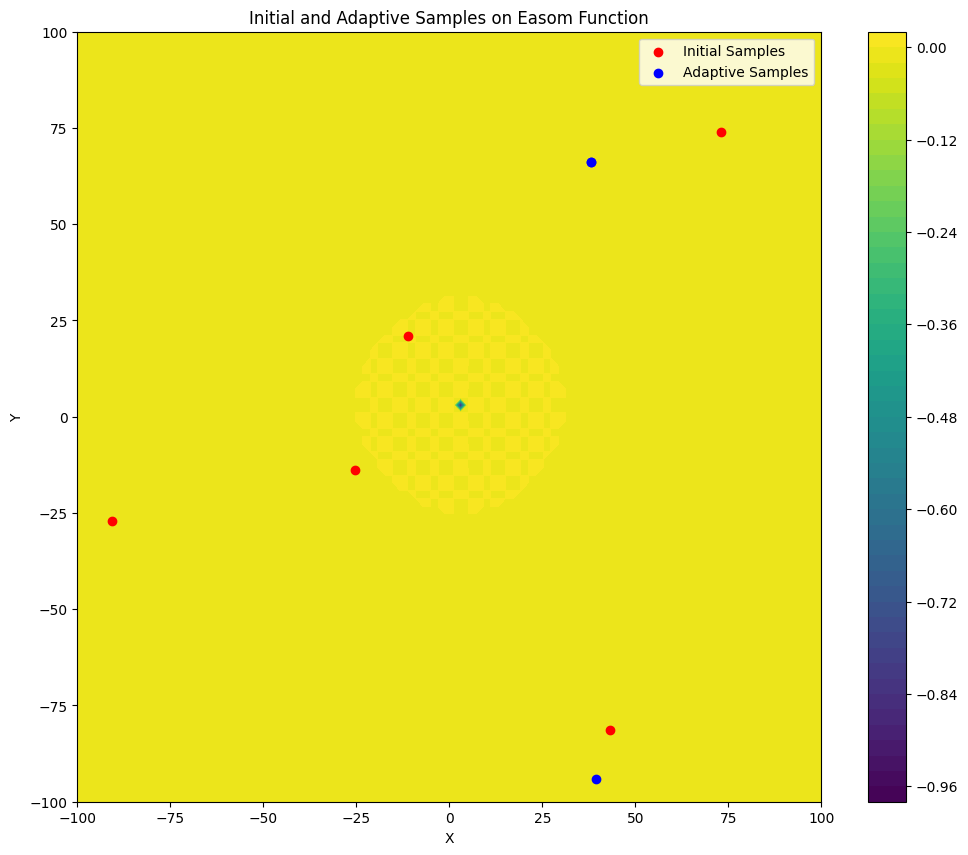

           X          Y
0  73.135132  73.931513
1 -25.392987 -13.778413
2 -90.783823 -27.094428
3  43.153604 -81.463972
4 -11.016333  20.882476
5  39.514403 -94.116139
6  38.028306  66.159504
7  38.028306  66.159504


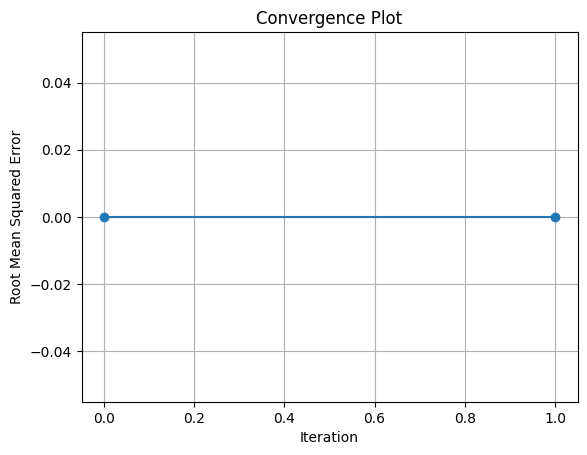

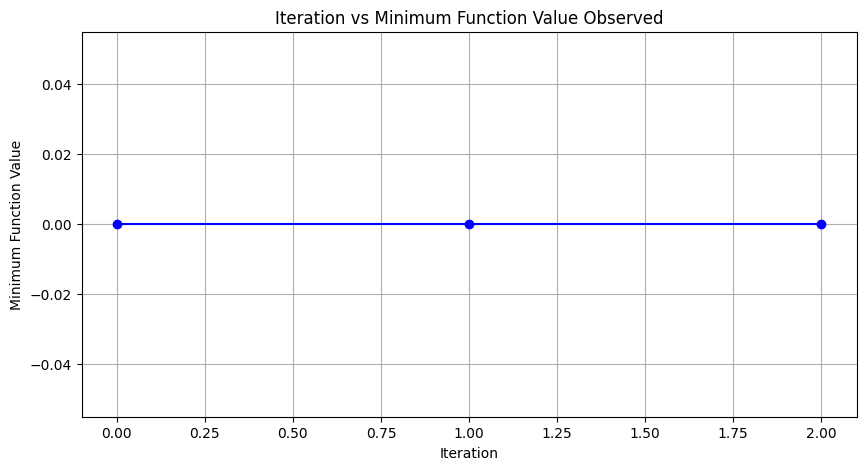

Best observed function value after active learning: 0.0
Actual global min value is: -1
******
******
******
******
Working on function: Beale
Iteration 1, RMSE: 3549.480925912496
Iteration 2, RMSE: 41039.90707764366
Iteration 3, RMSE: 16433.478484115956
Iteration 4, RMSE: 20233.32746490202
Iteration 5, RMSE: 31739.80533141873
Iteration 6, RMSE: 15259.227285187379
Iteration 7, RMSE: 14811.70512294693
Iteration 8, RMSE: 17225.657234837377
Iteration 9, RMSE: 13784.971666468116
Iteration 10, RMSE: 13319.62063442478
Iteration 11, RMSE: 13308.885842641583
Iteration 12, RMSE: 14590.154780860774
Iteration 13, RMSE: 16915.979523608654
Iteration 14, RMSE: 16464.830673408098
Iteration 15, RMSE: 14916.183855686568
Iteration 16, RMSE: 14564.873446476144
Iteration 17, RMSE: 14242.04778029342
Iteration 18, RMSE: 13071.570524223824
Iteration 19, RMSE: 14211.194231546957
Iteration 20, RMSE: 26953.66900296151
Iteration 21, RMSE: 13893.898716628915
Iteration 22, RMSE: 13634.192352050477
Iteration 23, RMS

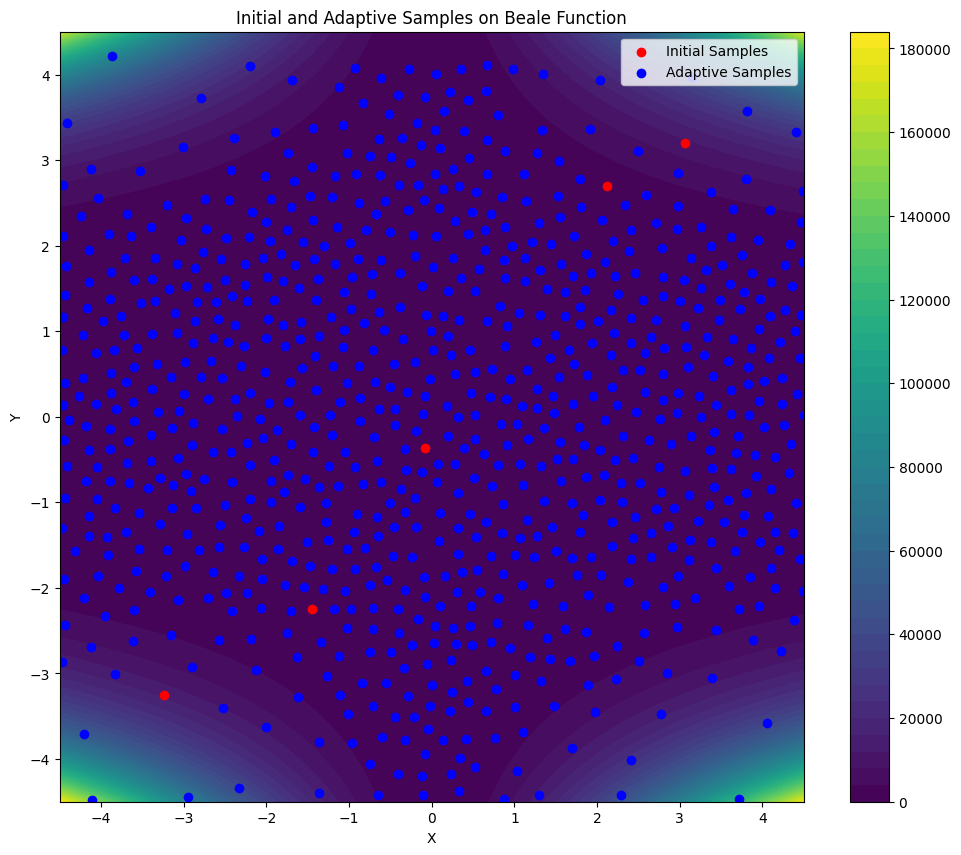

            X         Y
0   -1.448922 -2.243368
1   -0.082772 -0.360949
2   -3.238291 -3.256062
3    2.118802  2.698804
4    3.058803  3.202626
..        ...       ...
820  0.661659 -1.226178
821  0.131159  2.657914
822 -1.419773  1.845840
823 -0.674093  2.365075
824 -0.674093  2.365075

[825 rows x 2 columns]


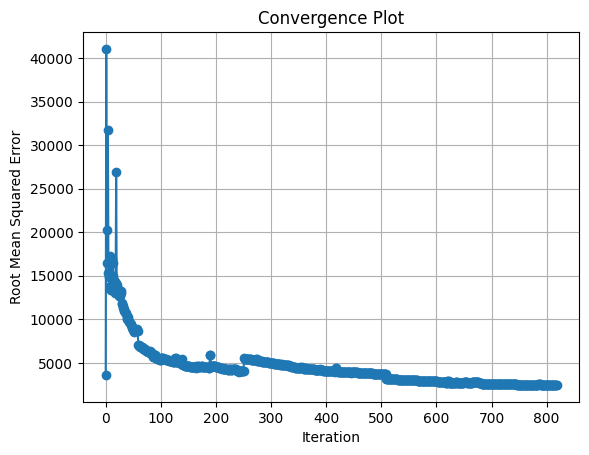

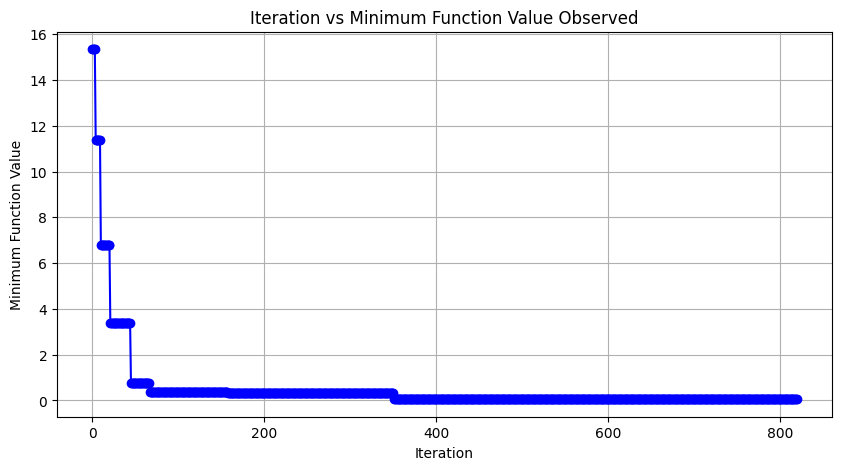

Best observed function value after active learning: 0.05519113075523598
Actual global min value is: 0
******
******
******
******
Working on function: Branin
Iteration 1, RMSE: 9.072813148906285
Iteration 2, RMSE: 38.405582378239686
Iteration 3, RMSE: 37.99657713036759
Iteration 4, RMSE: 37.77235422558542
Iteration 5, RMSE: 45.3602619069051
Iteration 6, RMSE: 29.569102460159115
Iteration 7, RMSE: 41.07329587011989
Iteration 8, RMSE: 40.030976833086704
Iteration 9, RMSE: 28.26269963710106
Iteration 10, RMSE: 27.754680111882113
Iteration 11, RMSE: 28.047152771929625
Iteration 12, RMSE: 23.947754279047185
Iteration 13, RMSE: 27.925795874940103
Iteration 14, RMSE: 41.42495045731495
Iteration 15, RMSE: 25.327099364952826
Iteration 16, RMSE: 27.671447105958073
Iteration 17, RMSE: 28.802155992371514
Iteration 18, RMSE: 21.643955545904785
Iteration 19, RMSE: 21.279916645762537
Iteration 20, RMSE: 32.453580232134655
Iteration 21, RMSE: 22.10256302654206
Iteration 22, RMSE: 22.005193051761804
Co

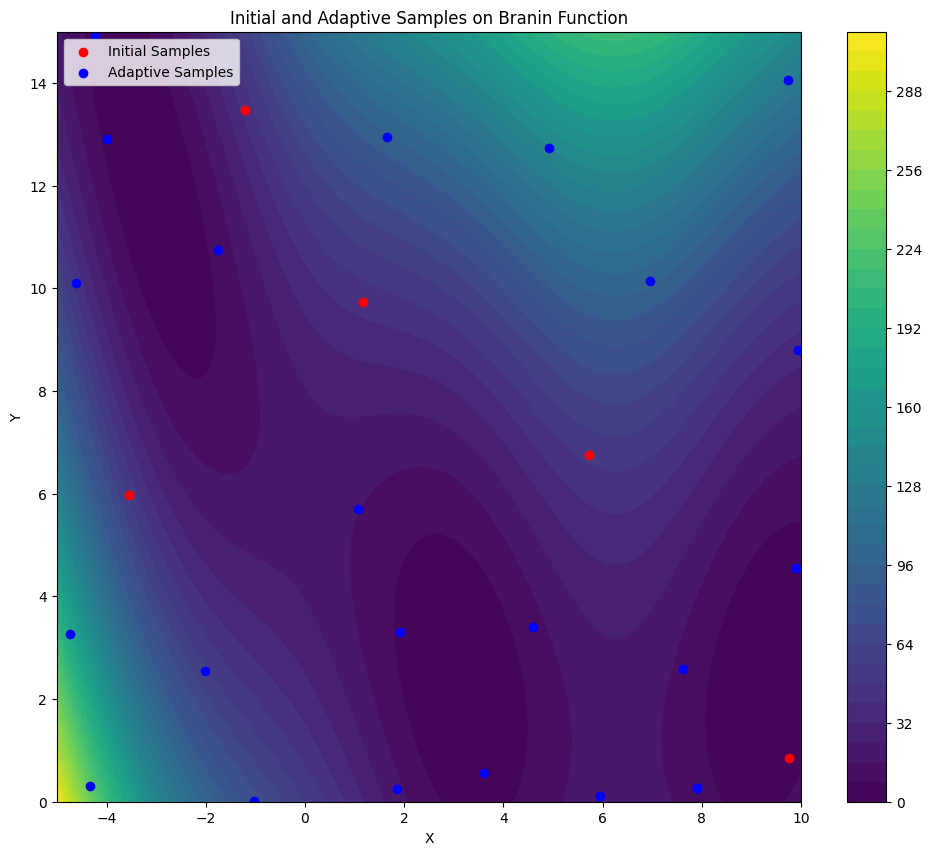

           X          Y
0   5.720986   6.748288
1  -1.212100  13.478886
2  -3.539973   5.970433
3   9.765760   0.859351
4   1.167728   9.733408
5   1.863468   0.257369
6   9.743479  14.067934
7  -4.342528   0.296905
8   5.951468   0.109676
9   4.914976  12.729180
10  9.946762   8.807901
11 -4.617644  10.108139
12 -2.013888   2.554197
13  4.597296   3.407073
14  9.907654   4.544813
15  1.077982   5.709327
16  7.627658   2.586139
17 -4.740465   3.273806
18 -3.991958  12.903079
19 -1.020900   0.022917
20  6.956805  10.139365
21  1.653542  12.942853
22  3.616232   0.563976
23  1.924779   3.298818
24 -4.231164  14.942798
25 -1.761794  10.754586
26  7.897706   0.258716
27  7.897706   0.258716


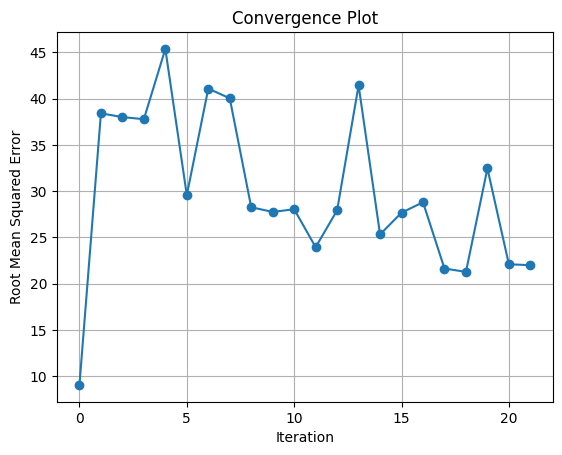

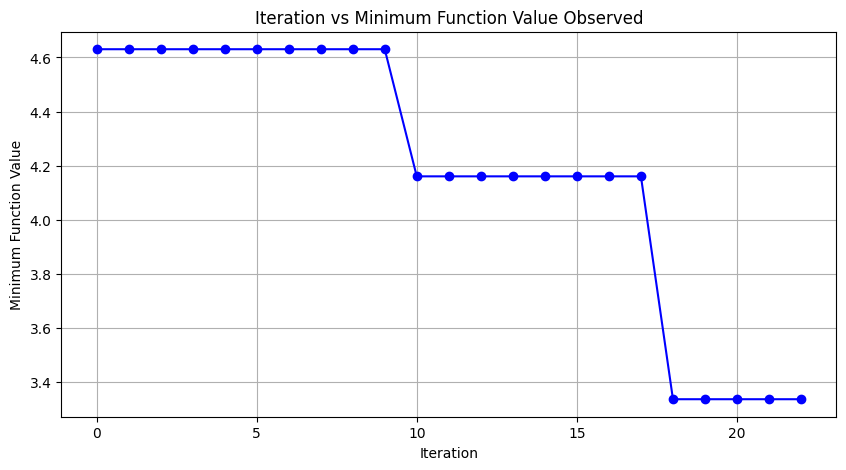

Best observed function value after active learning: 3.3361586751051986
Actual global min value is: 0.3979
******
******
******
******
Working on function: Colville
Iteration 1, RMSE: 303039.65853159095
Iteration 2, RMSE: 348045.8629487456
Iteration 3, RMSE: 232902.25901033054
Iteration 4, RMSE: 300372.9343984792
Iteration 5, RMSE: 489073.302733745
Iteration 6, RMSE: 193057.18651079797
Iteration 7, RMSE: 201228.46935686213
Iteration 8, RMSE: 195172.36434870042
Iteration 9, RMSE: 164355.9766934152
Iteration 10, RMSE: 162748.4065823228
Iteration 11, RMSE: 197922.15770447106
Iteration 12, RMSE: 156458.95264679668
Iteration 13, RMSE: 152516.66415350186
Iteration 14, RMSE: 149126.3659716995
Iteration 15, RMSE: 165514.77249142376
Iteration 16, RMSE: 188025.68629083
Iteration 17, RMSE: 208656.1701027897
Iteration 18, RMSE: 141854.59946056243
Iteration 19, RMSE: 156888.75763583387
Iteration 20, RMSE: 153866.15114770603
Iteration 21, RMSE: 142932.12886509253
Iteration 22, RMSE: 142935.9611564436

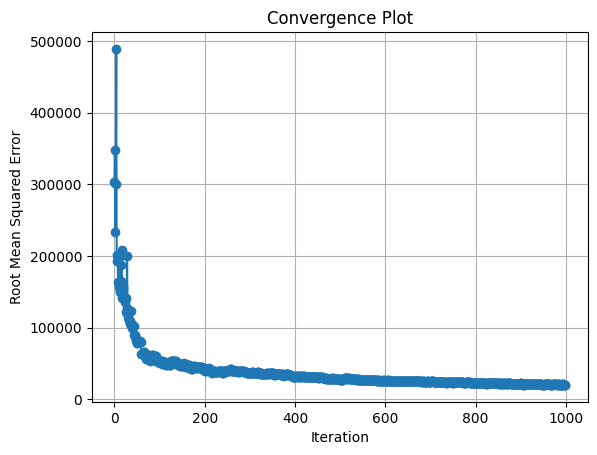

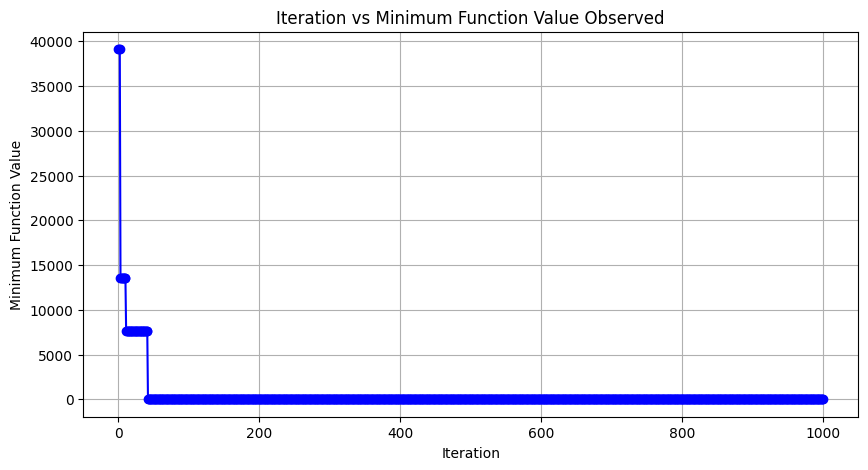

Best observed function value after active learning: 12.341985149653256
Actual global min value is: 0
******
******
******
******


In [5]:
# Fonksiyonların isimlerini al
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
for function_name in function_names:
    try:
        print(f"Working on function: {function_name}")

        function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

        # Aralığı al
        range_param = ex_func.function_ranges[function_name]

        # Generate a mesh for the background function
        input, output = samplers.Sampler.generate_mesh(range_param, num_points=100, function=function_param)

        # Generate initial samples
        sampler = samplers.LatinHypercubeSampling(function_param)
        initial_points = sampler.sample(num_samples=5, ranges=range_param)
        initial_values = np.array([function_param(i) for i in initial_points])

        # Train the initial model using random forests
        rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
        rf_model.train_model(initial_points, initial_values)
        trained_rf_model = rf_model.get_model()

        # Perform active learning
        active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
        min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

        # Plot the results
        sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values,improvement)
        sampling_vis.plot_visuals(input, output, function_name)
        sampling_vis.plot_results()

        print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
        

    except Exception as e:
        print(f"{function_name} function failed.")
        print(e)

    print("******")
    print("******")
    print("******")
    print("******")
